In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import norm
from matplotlib.ticker import ScalarFormatter
sns.set_palette('bright')

In [69]:
df = pd.read_csv('walmart_data.csv')
df.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200


In [70]:
df.shape

(550068, 10)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [72]:
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

#### There are 5891 distinct customers, 3631 distinct products, 21 different occupations, 3 city category, 5 distinct Stay In Current City in Years, 20 product categories.

In [73]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

#### There are NO NULL values in the data.

In [74]:
#Total Sales till date is
df['Purchase'].sum()

5095812742

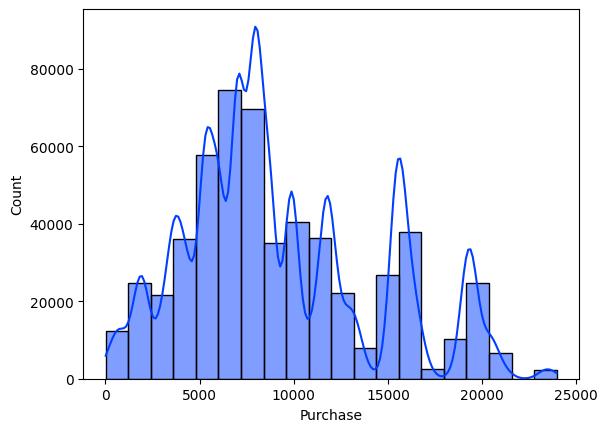

In [75]:
sns.histplot(df, x= 'Purchase', kde= True , bins = 20)
plt.show()

#### Total Sales till date is 5,095,812,742 $

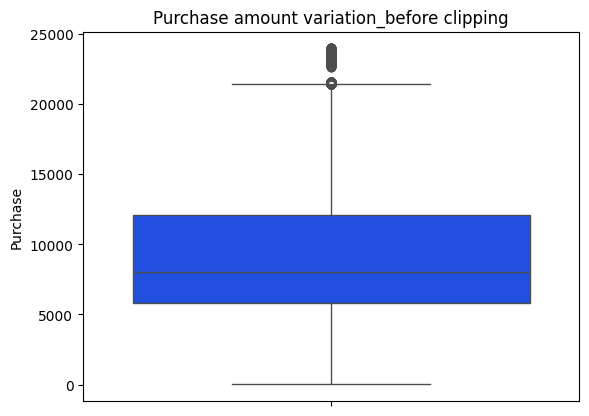

In [76]:
sns.boxplot(df['Purchase'])
plt.title('Purchase amount variation_before clipping')
plt.show()

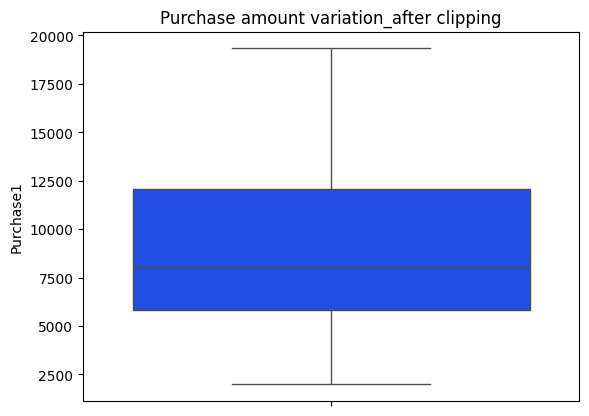

In [77]:
a,b = np.percentile(df['Purchase'],5), np.percentile(df['Purchase'],95)
# df1 = df
df['Purchase1'] = np.clip(df['Purchase'], a_min = a, a_max= b)
sns.boxplot(df['Purchase1'])
plt.title('Purchase amount variation_after clipping')
plt.show()

In [78]:
#Total Sales till date is (after clipping)
df['Purchase1'].sum()

5091820225

The difference between total purchase before and after clipping is 3992517$ (5095812742$ - 5091820225$)

In [79]:
5095812742 - 5091820225

3992517

# Graphical Analysis

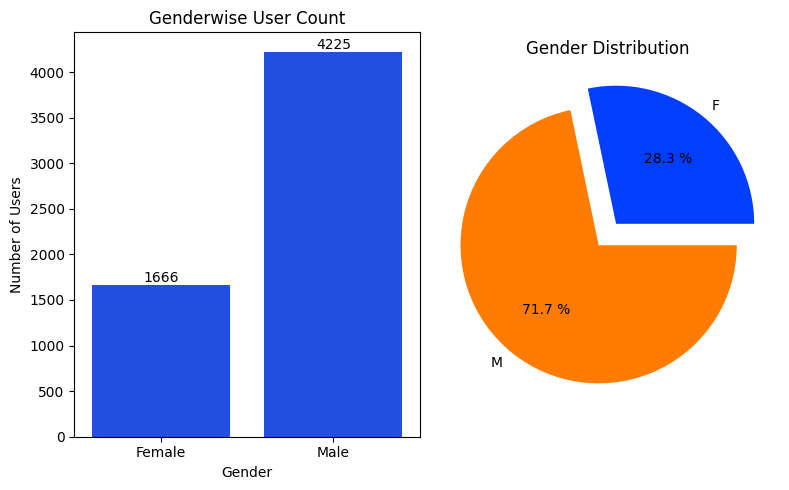

In [80]:
grp1 = pd.DataFrame(df.groupby(['Gender']).agg({'User_ID':'nunique'})).reset_index()

plt.figure(figsize=[8,5], num= 2)

plt.subplot(121)

ax = sns.barplot(grp1, x = 'Gender' , y = 'User_ID')
plt.title('Genderwise User Count', loc= 'center')
plt.ylabel('Number of Users')
plt.xticks([0, 1], ['Female', 'Male'])

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 5),
                   textcoords = 'offset points')

plt.subplot(122, aspect = 'equal')
plt.pie(grp1['User_ID'], labels= grp1['Gender'], autopct= '%1.1f %%', explode= [0.1,0.1])
plt.title('Gender Distribution')
plt.tight_layout()
plt.show()

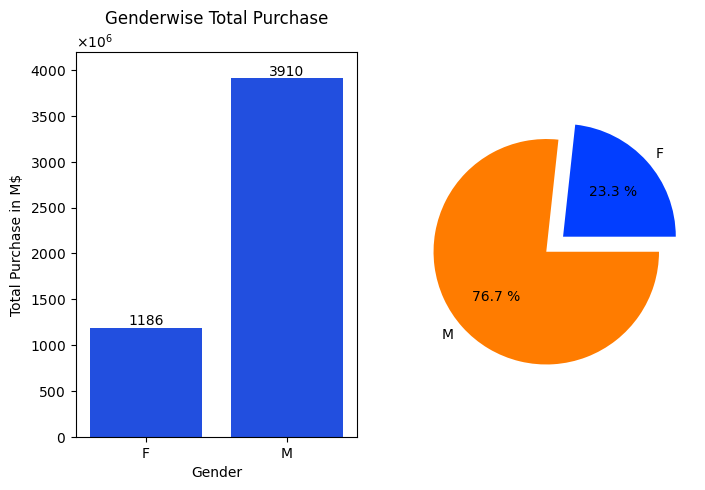

In [81]:
grp2 = pd.DataFrame(df.groupby(['Gender']).agg({'Purchase':'sum'})).reset_index()
plt.figure(figsize=[8,5] , num = 2)

plt.subplot(121)
ax =sns.barplot(grp2, x = 'Gender' , y = 'Purchase')
plt.title('Genderwise Total Purchase', loc= 'center')
plt.ylabel('Total Purchase in M$')
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True, useOffset=False))
ax.ticklabel_format(axis='y', style='sci', scilimits=(6,6))
for p in ax.patches:
    ax.annotate(format(p.get_height()/10**6, '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 5),
                   textcoords = 'offset points',
                   )
plt.ylim(0,4200*10**6)

plt.subplot(122, aspect = 'equal')

plt.pie(grp2['Purchase'] , labels= grp2['Gender'], autopct= '%1.1f %%', explode= [0.1,0.1])
plt.show()

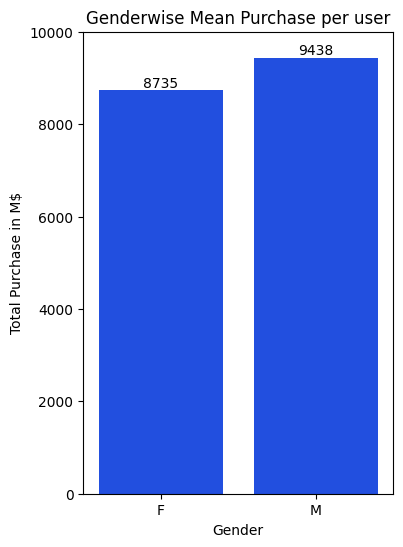

In [82]:
grp2_1 = pd.DataFrame(df.groupby(['Gender']).agg({'Purchase':'mean'})).reset_index()
plt.figure(figsize=[4,6])
ax =sns.barplot(grp2_1, x = 'Gender' , y = 'Purchase')
plt.title('Genderwise Mean Purchase per user', loc= 'center')
plt.ylabel('Total Purchase in M$')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 5),
                   textcoords = 'offset points',
                   )
plt.ylim(0,10000)
plt.show()

#### The total purchase amount made by males significantly exceeds that of females. Additionally, the average purchase per user among males is higher than that among females.

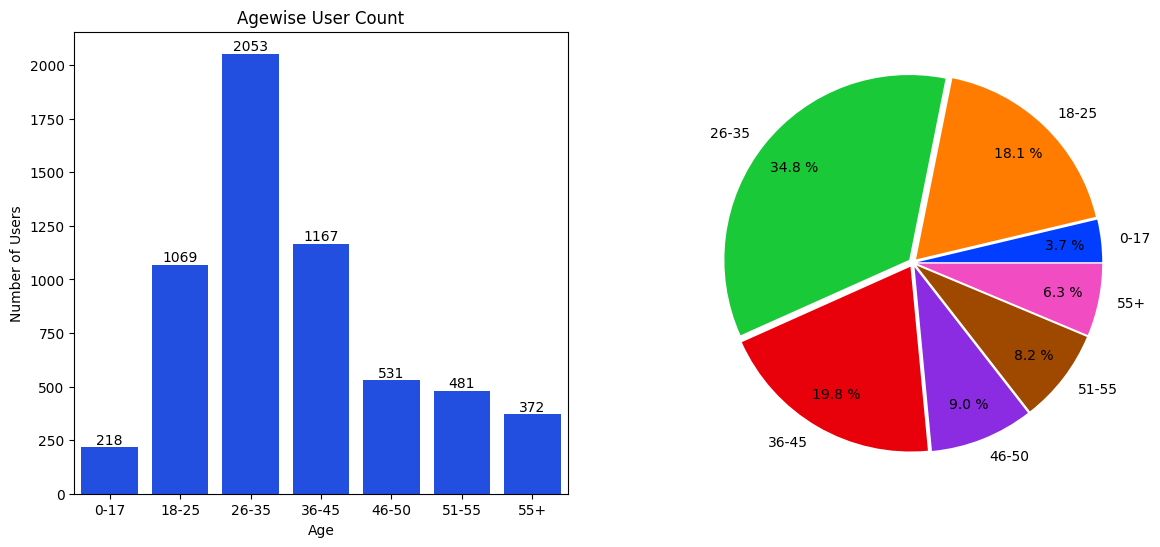

In [83]:
grp3 = pd.DataFrame(df.groupby(['Age']).agg({'User_ID':'nunique'})).reset_index()
plt.figure(figsize=[14,6], num = 2)

plt.subplot(121)
ax = sns.barplot(grp3, x = 'Age' , y = 'User_ID')
plt.title('Agewise User Count', loc= 'center')
plt.ylabel('Number of Users')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 5),
                   textcoords = 'offset points')

plt.subplot(122, aspect = 'equal')
plt.pie(grp3['User_ID'] , labels= grp3['Age'] , explode = [0.025] * len(grp3['Age']), autopct= '%1.1f %%' , pctdistance= 0.8 )
plt.show()

#### Maximum users are from Age range 26-35 followed by 36-45 with 2053 and 1167 users respectively.

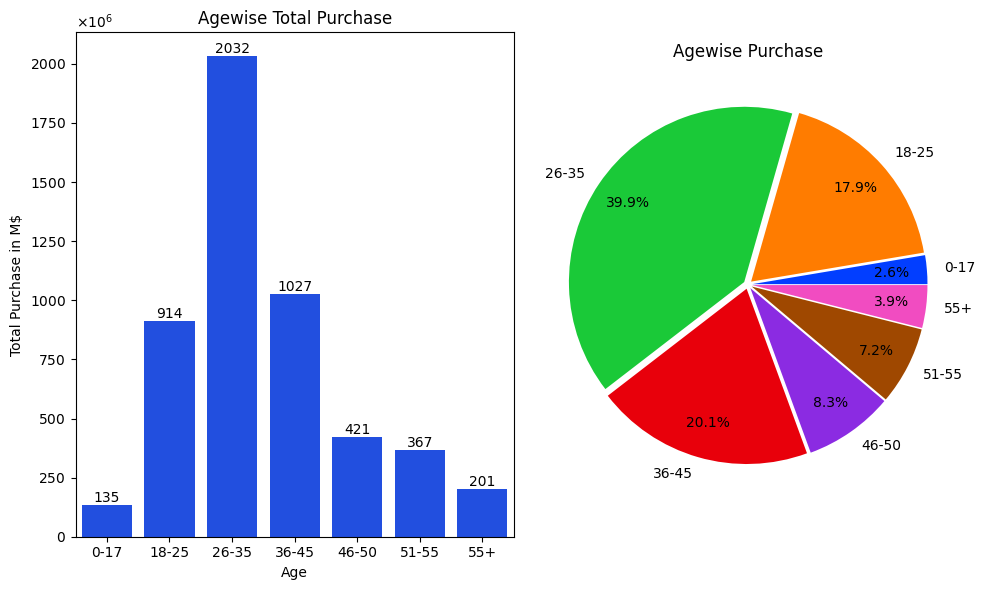

In [84]:
grp4 = pd.DataFrame(df.groupby(['Age']).agg({'Purchase':'sum'})).reset_index()
plt.figure(figsize=[10,6], num = 2)

plt.subplot(121)
ax = sns.barplot(grp4, x = 'Age' , y = 'Purchase')
plt.title('Agewise Total Purchase', loc= 'center')
plt.ylabel('Total Purchase in M$')
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True, useOffset=False))
ax.ticklabel_format(axis='y', style='sci', scilimits=(6,6))
for p in ax.patches:
    ax.annotate(format(p.get_height()/10**6, '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 5),
                   textcoords = 'offset points')


plt.subplot(122, aspect = 'equal')
plt.pie(grp4['Purchase'], labels=grp4['Age'], explode = [0.025] * len(grp4), autopct= '%1.1f%%', pctdistance= 0.8)
plt.title('Agewise Purchase', loc= 'center')
plt.tight_layout()
plt.show()

#### The maximum purchase has been done by the Agegroup of 26-35, leading by 2032 M$ (39.9%), followed by 36-45  with 1027M$ (20.1%). Lowest is of 0-17 and 55+ with 135 M$ and 201 M$

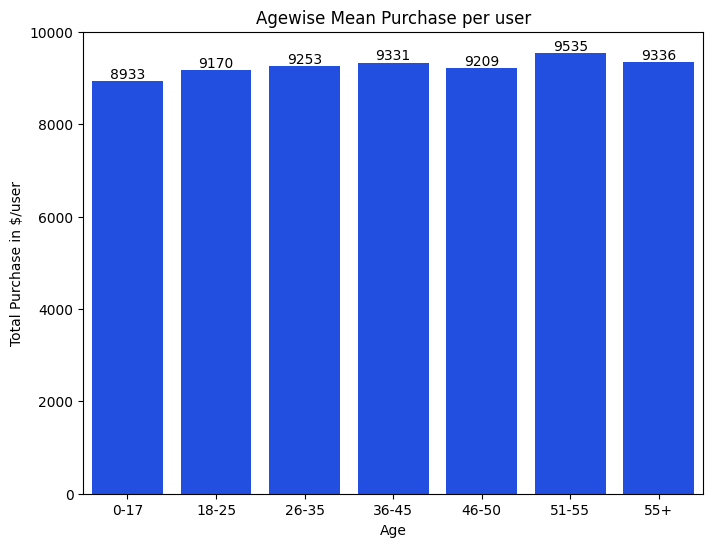

In [85]:
grp4_1 = pd.DataFrame(df.groupby(['Age']).agg({'Purchase':'mean'})).reset_index()
plt.figure(figsize=[8,6])
ax = sns.barplot(grp4_1, x = 'Age' , y = 'Purchase')
plt.title('Agewise Mean Purchase per user', loc= 'center')
plt.ylabel('Total Purchase in $/user')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 5),
                   textcoords = 'offset points')
plt.ylim(0,10000)
plt.show()

#### The most spending user is age group 51-55 , followed by 36-45 with 9535$ and 9331$ respectively. The lowest spending age group is 0-17 and 18-25 with 8933$ and 9170$.

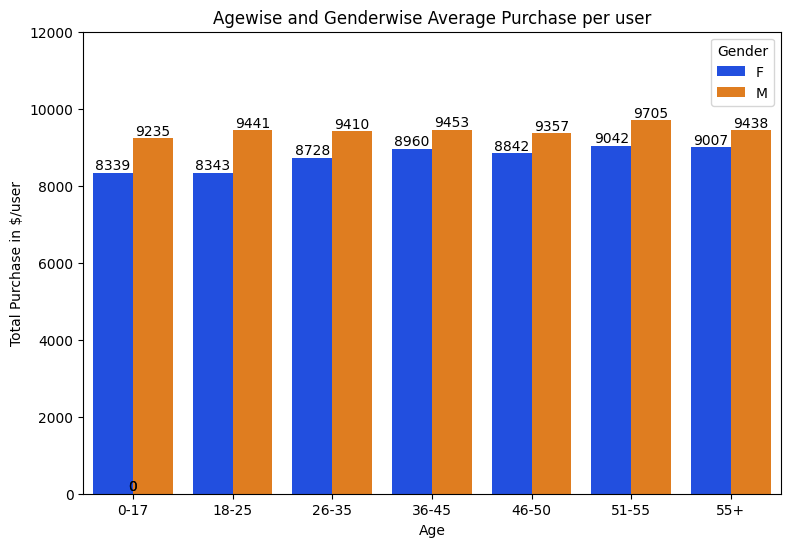

In [86]:
grp4_2 = pd.DataFrame(df.groupby(['Age','Gender']).agg({'Purchase':'mean'})).reset_index()
plt.figure(figsize=[9,6])
ax = sns.barplot(grp4_2, x = 'Age' , y = 'Purchase', hue= 'Gender')
plt.title('Agewise and Genderwise Average Purchase per user', loc= 'center')
plt.ylabel('Total Purchase in $/user')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 5),
                   textcoords = 'offset points')
plt.ylim(0,12000)
plt.show()

#### The Average spendings of men is higher than women in all age ranges.

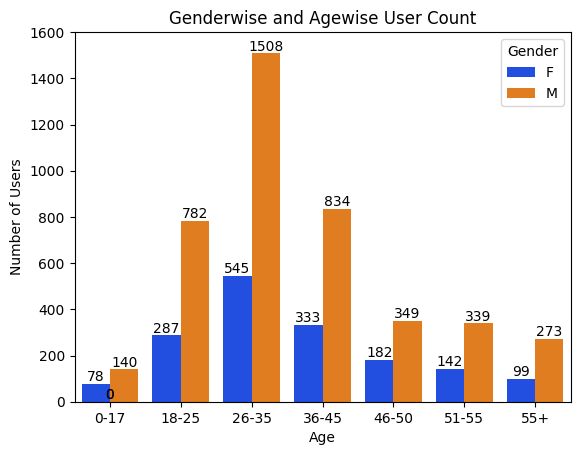

In [87]:
grp5 = pd.DataFrame(df.groupby(['Gender','Age']).agg({'User_ID':'nunique'})).reset_index()
ax = sns.barplot(grp5, x = 'Age' , y = 'User_ID', hue='Gender')
plt.title('Genderwise and Agewise User Count', loc= 'center')
plt.ylabel('Number of Users')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 5),
                   textcoords = 'offset points')
plt.ylim(0,1600)
plt.show()

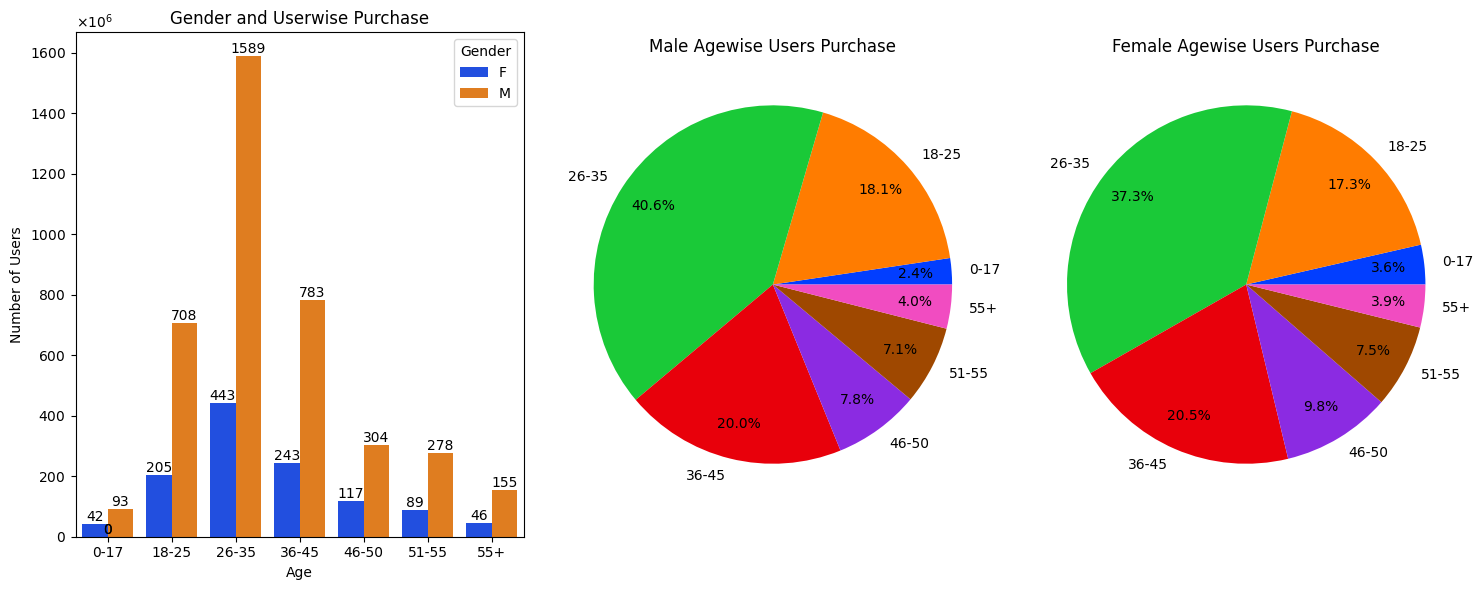

In [88]:
grp6 = pd.DataFrame(df.groupby(['Gender','Age']).agg({'Purchase':'sum'})).reset_index()
plt.figure(num= 3,figsize= (15,6))

plt.subplot(131)
ax = sns.barplot(grp6 , x = 'Age' , y = 'Purchase', hue='Gender')
plt.title('Gender and Userwise Purchase', loc= 'center')
plt.ylabel('Number of Users')
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True, useOffset=False))
ax.ticklabel_format(axis='y', style='sci', scilimits=(6,6))
for p in ax.patches:
    ax.annotate(format(p.get_height()/10**6, '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()+25),
                   ha = 'center', va = 'center',
                   xytext = (0, 5),
                   textcoords = 'offset points',
                   rotation = 0)

plt.subplot(132, aspect = 'equal')
plt.pie(grp6[grp6['Gender'] == 'M']['Purchase'], labels= (grp6[grp6['Gender']=='M']['Age']), autopct= '%1.1f%%', pctdistance= 0.8)
plt.title('Male Agewise Users Purchase')

plt.subplot(133, aspect = 'equal')
plt.pie(grp6[grp6['Gender'] == 'F']['Purchase'], labels= (grp6[grp6['Gender']=='F']['Age']), autopct= '%1.1f%%', pctdistance= 0.8)
plt.title('Female Agewise Users Purchase')

plt.tight_layout()
plt.show()

1. There are 4225 Males and 1666 Female customers with purchase amounting $3910 Million and $1186 Million respectively.
2. Most of the customers are in the age range 18-45.

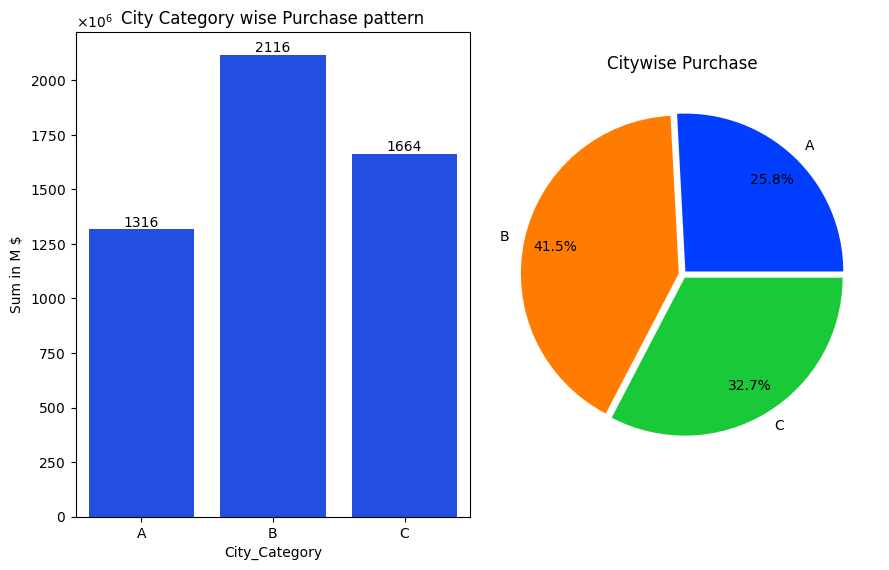

In [89]:
grp7 = pd.DataFrame(df.groupby(['City_Category']).agg({'Purchase':'sum'})).reset_index()
plt.figure(num= 2, figsize= (9,6))

plt.subplot(121)
ax = sns.barplot(grp7 , x = 'City_Category' , y = 'Purchase')
plt.title('City Category wise Purchase pattern', loc= 'center')
plt.ylabel('Sum in M $')
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True, useOffset=False))
ax.ticklabel_format(axis='y', style='sci', scilimits=(6,6))
for p in ax.patches:
    ax.annotate(format(p.get_height()/10**6, '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()+25),
                   ha = 'center', va = 'center',
                   xytext = (0, 5),
                   textcoords = 'offset points',
                   rotation = 0)

plt.subplot(122, aspect = 'equal')
plt.pie(grp7['Purchase'], labels=grp7['City_Category'], explode = [0.025] * len(grp7), autopct= '%1.1f%%', pctdistance= 0.8)
plt.title('Citywise Purchase', loc= 'center')
plt.tight_layout()

plt.show()

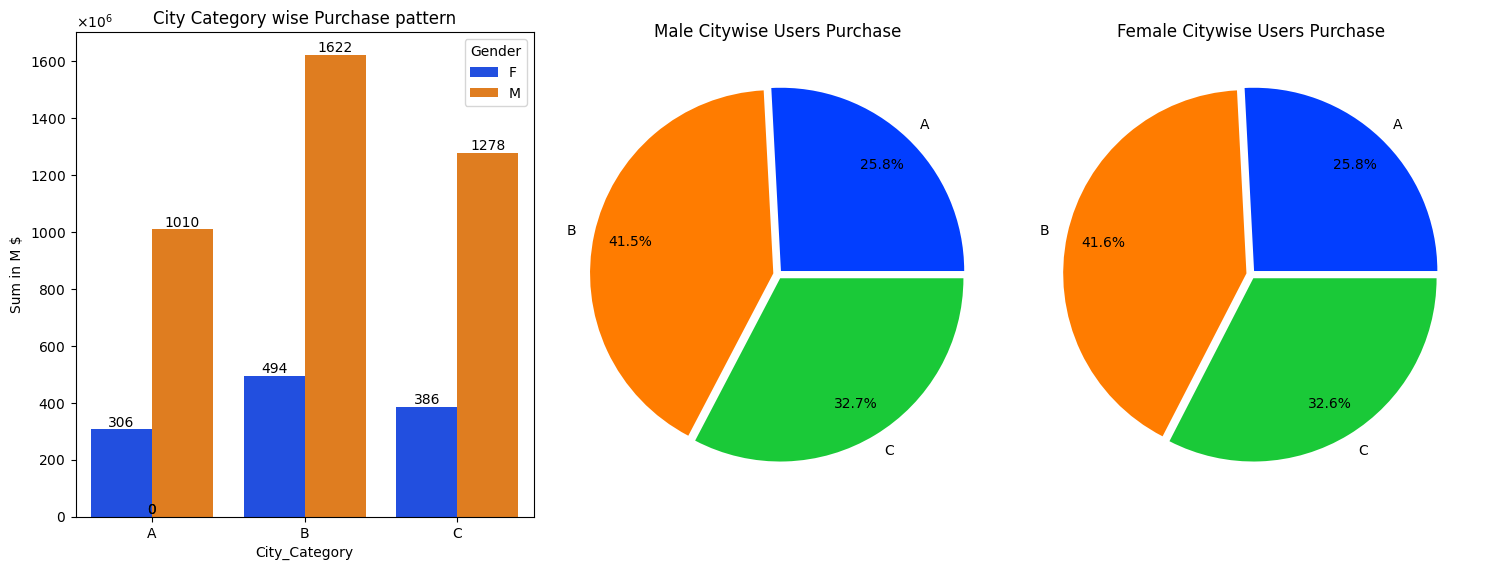

In [90]:
grp7_1 = pd.DataFrame(df.groupby(['City_Category','Gender']).agg({'Purchase':'sum'})).reset_index()
plt.figure(num = 3 , figsize = (15,6))

plt.subplot(131)
ax = sns.barplot(grp7_1 , x = 'City_Category' , y = 'Purchase', hue = 'Gender')
plt.title('City Category wise Purchase pattern', loc= 'center')
plt.ylabel('Sum in M $')
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True, useOffset=False))
ax.ticklabel_format(axis='y', style='sci', scilimits=(6,6))
for p in ax.patches:
    ax.annotate(format(p.get_height()/10**6, '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()+25),
                   ha = 'center', va = 'center',
                   xytext = (0, 5),
                   textcoords = 'offset points',
                   rotation = 0)

plt.subplot(132, aspect = 'equal')
plt.pie(grp7_1[grp7_1['Gender'] == 'M']['Purchase'], labels= (grp7_1[grp7_1['Gender']=='M']['City_Category']),
        autopct= '%1.1f%%', pctdistance= 0.8,explode= [0.025]*(len(grp7_1[grp7_1['Gender'] == 'F'])))
plt.title('Male Citywise Users Purchase')

plt.subplot(133, aspect = 'equal')
plt.pie(grp7_1[grp7_1['Gender'] == 'F']['Purchase'], labels= (grp7_1[grp7_1['Gender']=='F']['City_Category']),
        autopct= '%1.1f%%', pctdistance= 0.8, explode= [0.025]*(len(grp7_1[grp7_1['Gender'] == 'F'])))
plt.title('Female Citywise Users Purchase')


plt.tight_layout()


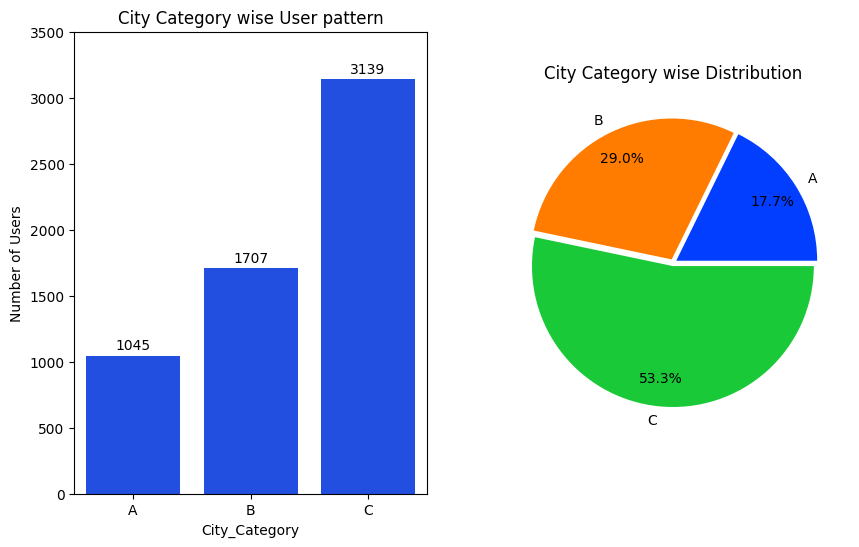

In [91]:
grp8 = pd.DataFrame(df.groupby(['City_Category']).agg({'User_ID':'nunique'})).reset_index()
plt.figure(figsize = (10,6), num = 2)

plt.subplot(121)
ax = sns.barplot(grp8 , x = 'City_Category' , y = 'User_ID')
plt.title('City Category wise User pattern', loc= 'center')
plt.ylabel('Number of Users')
# ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True, useOffset=False))
# ax.ticklabel_format(axis='y', style='sci', scilimits=(9,9))
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()+25),
                   ha = 'center', va = 'center',
                   xytext = (0, 5),
                   textcoords = 'offset points',
                   rotation = 0)
plt.ylim(0,3500)

plt.subplot(122, aspect = 'equal')

plt.pie(grp8['User_ID'], labels= grp8['City_Category'], autopct= '%1.1f%%', pctdistance= 0.8,
        explode= [0.025]*len(grp8['User_ID']))
plt.title('City Category wise Distribution')

plt.show()

#### Majority of users are in the city_category C followed by B.
#### The Category B city is leading in sales and Genderwise as well.

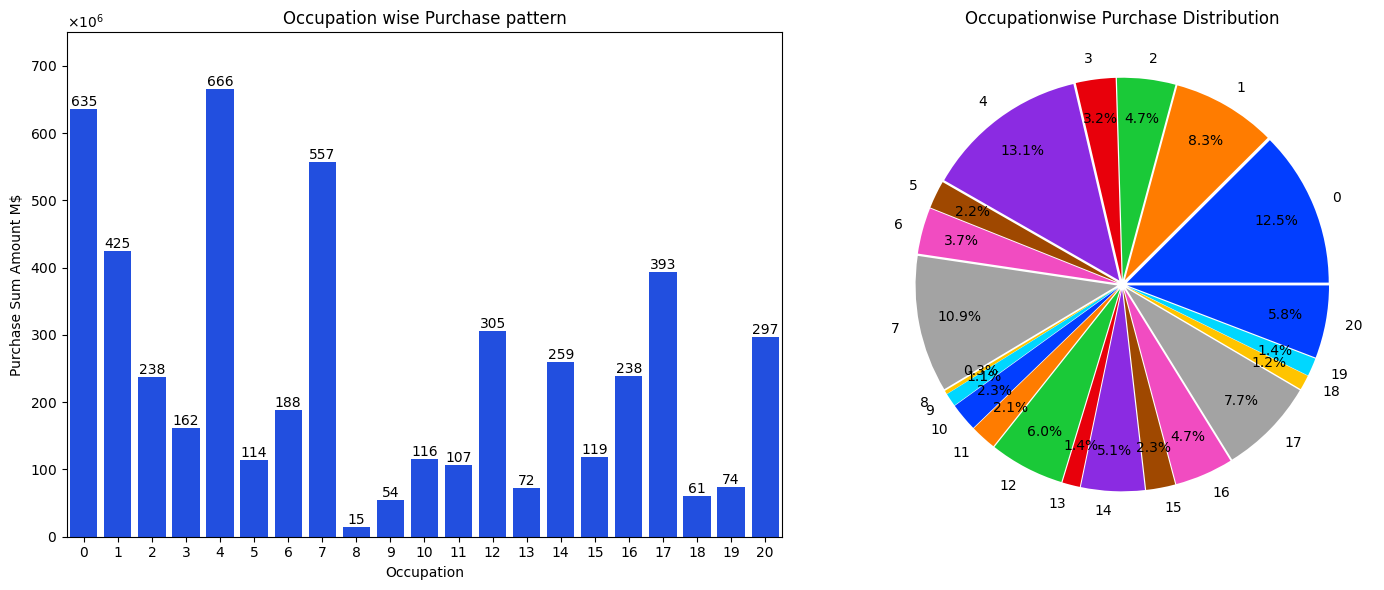

In [92]:
grp9 = pd.DataFrame(df.groupby(['Occupation']).agg({'Purchase' : 'sum'})).reset_index()
plt.figure(figsize=(15,6),num= 2)

plt.subplot(121)
ax = sns.barplot(grp9, x = 'Occupation', y = 'Purchase')
plt.title('Occupation wise Purchase pattern', loc= 'center')
plt.ylabel('Purchase Sum Amount M$')
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True, useOffset=False))
ax.ticklabel_format(axis='y', style='sci', scilimits=(6,6))
for p in ax.patches:
    ax.annotate(format(p.get_height()/10**6, '.0f'),
                   (p.get_x() + p.get_width() / 2, p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 5),
                   textcoords = 'offset points',
                   rotation = 0)
plt.ylim(0,750*10**6)

plt.subplot(122)
plt.pie(grp9['Purchase'], labels = grp9['Occupation'],
        autopct = "%1.1f%%", pctdistance= 0.8,
        explode= [0.025]*len(grp9['Occupation']))
plt.title('Occupationwise Purchase Distribution')
plt.tight_layout()
plt.show()

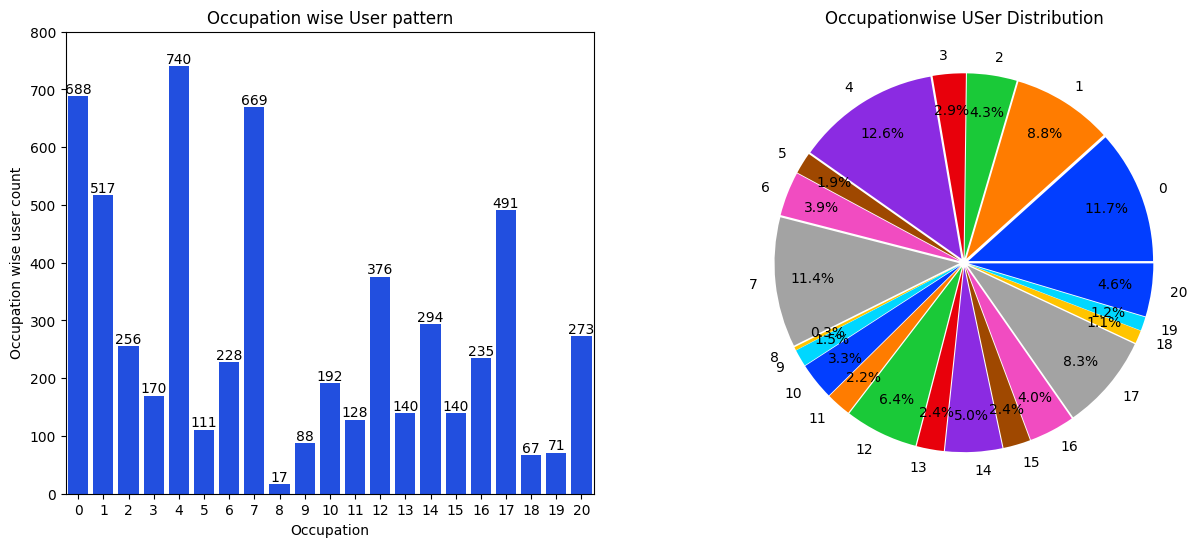

In [93]:
grp10 = pd.DataFrame(df.groupby(['Occupation']).agg({'User_ID' : 'nunique'})).reset_index()
plt.figure(figsize=(15,6), num =2)

plt.subplot(121)
ax = sns.barplot(grp10, x = 'Occupation', y = 'User_ID')
plt.title('Occupation wise User pattern', loc= 'center')
plt.ylabel('Occupation wise user count')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                   (p.get_x() + p.get_width() / 2, p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 5),
                   textcoords = 'offset points',
                   rotation = 0)
plt.ylim(0,800)

plt.subplot(122)

plt.pie(grp10['User_ID'], labels= grp10['Occupation'],
        autopct = '%1.1f%%', pctdistance= .8,
        explode=[0.025]*len(grp10['Occupation']))
plt.title('Occupationwise USer Distribution')
plt.show()

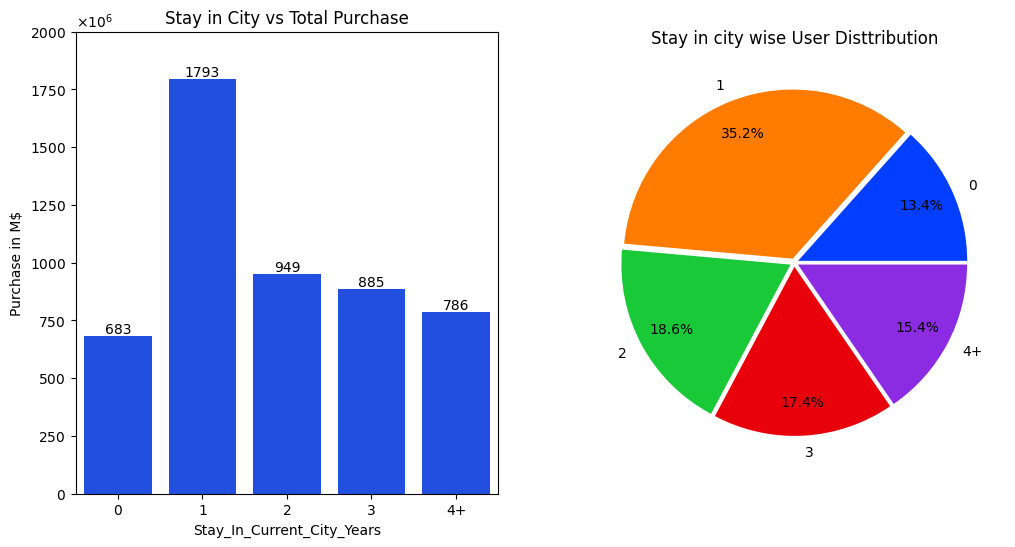

In [94]:
grp11 = pd.DataFrame(df.groupby('Stay_In_Current_City_Years').agg({'Purchase': 'sum'})).reset_index()
plt.figure(num = 2,  figsize=(12,6))

plt.subplot(121)
ax = sns.barplot(grp11, x = 'Stay_In_Current_City_Years', y= 'Purchase')
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True, useOffset=False))
ax.ticklabel_format(axis='y', style='sci', scilimits=(6,6))
for p in ax.patches:
    ax.annotate(format(p.get_height()/10**6, '.0f'),
                   (p.get_x() + p.get_width() / 2, p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 5),
                   textcoords = 'offset points',
                   rotation = 0)
plt.ylim(0,2*10**9)
plt.ylabel('Purchase in M$')
plt.title('Stay in City vs Total Purchase')

plt.subplot(122)
plt.pie(grp11['Purchase'], labels = grp11['Stay_In_Current_City_Years'],
        autopct = '%1.1f%%', pctdistance= 0.8,
        explode=[0.025]*len(grp11['Stay_In_Current_City_Years']))
plt.title('Stay in city wise User Disttribution')

plt.show()

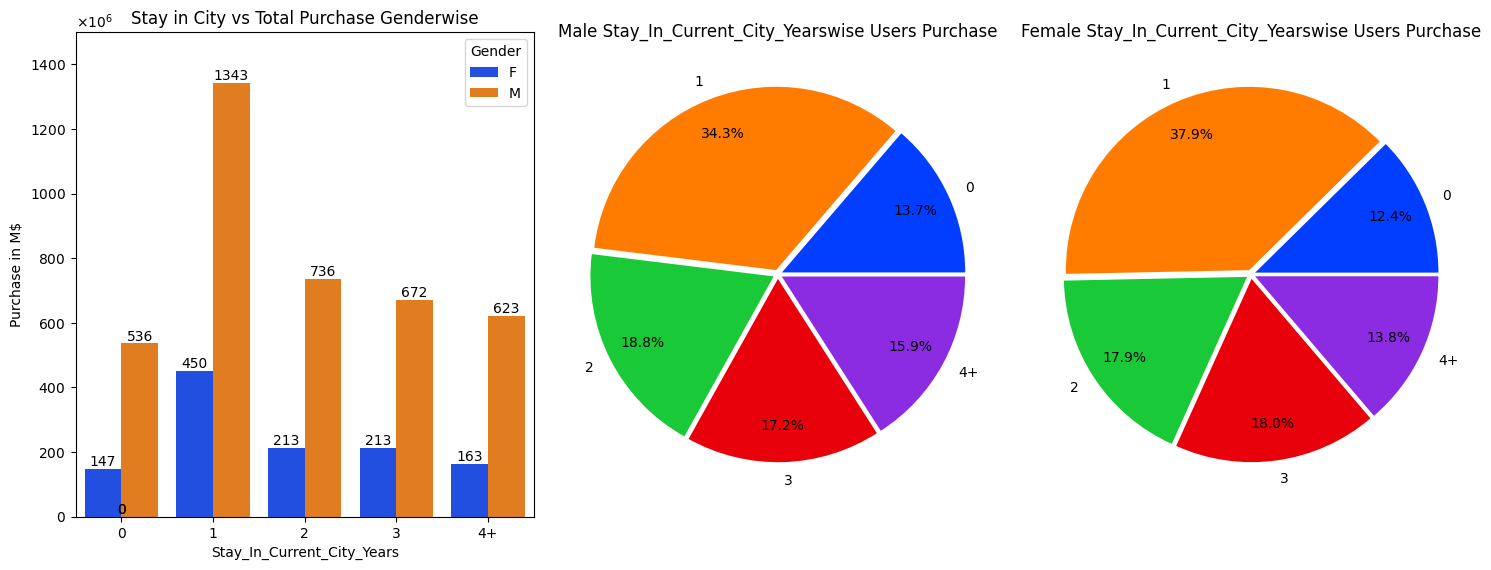

In [95]:
grp11_1 = pd.DataFrame(df.groupby(['Stay_In_Current_City_Years','Gender']).agg({'Purchase': 'sum'})).reset_index()
plt.figure(num=3, figsize=(15,6))

plt.subplot(131)
ax = sns.barplot(grp11_1, x = 'Stay_In_Current_City_Years', y= 'Purchase', hue = 'Gender')
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True, useOffset=False))
ax.ticklabel_format(axis='y', style='sci', scilimits=(6,6))
for p in ax.patches:
    ax.annotate(format(p.get_height()/10**6, '.0f'),
                   (p.get_x() + p.get_width() / 2, p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 5),
                   textcoords = 'offset points',
                   rotation = 0)
plt.ylim(0,1.5*10**9)
plt.ylabel('Purchase in M$')
plt.title('Stay in City vs Total Purchase Genderwise')

plt.subplot(132, aspect = 'equal')
plt.pie(grp11_1[grp11_1['Gender'] == 'M']['Purchase'], labels= (grp11_1[grp11_1['Gender']=='M']['Stay_In_Current_City_Years']),
        autopct= '%1.1f%%', pctdistance= 0.8,explode= [0.025]*(len(grp11_1[grp11_1['Gender'] == 'F'])))
plt.title('Male Stay_In_Current_City_Yearswise Users Purchase')

plt.subplot(133, aspect = 'equal')
plt.pie(grp11_1[grp11_1['Gender'] == 'F']['Purchase'], labels= (grp11_1[grp11_1['Gender']=='F']['Stay_In_Current_City_Years']),
        autopct= '%1.1f%%', pctdistance= 0.8, explode= [0.025]*(len(grp11_1[grp11_1['Gender'] == 'F'])))
plt.title('Female Stay_In_Current_City_Yearswise Users Purchase')



plt.tight_layout()


plt.show()

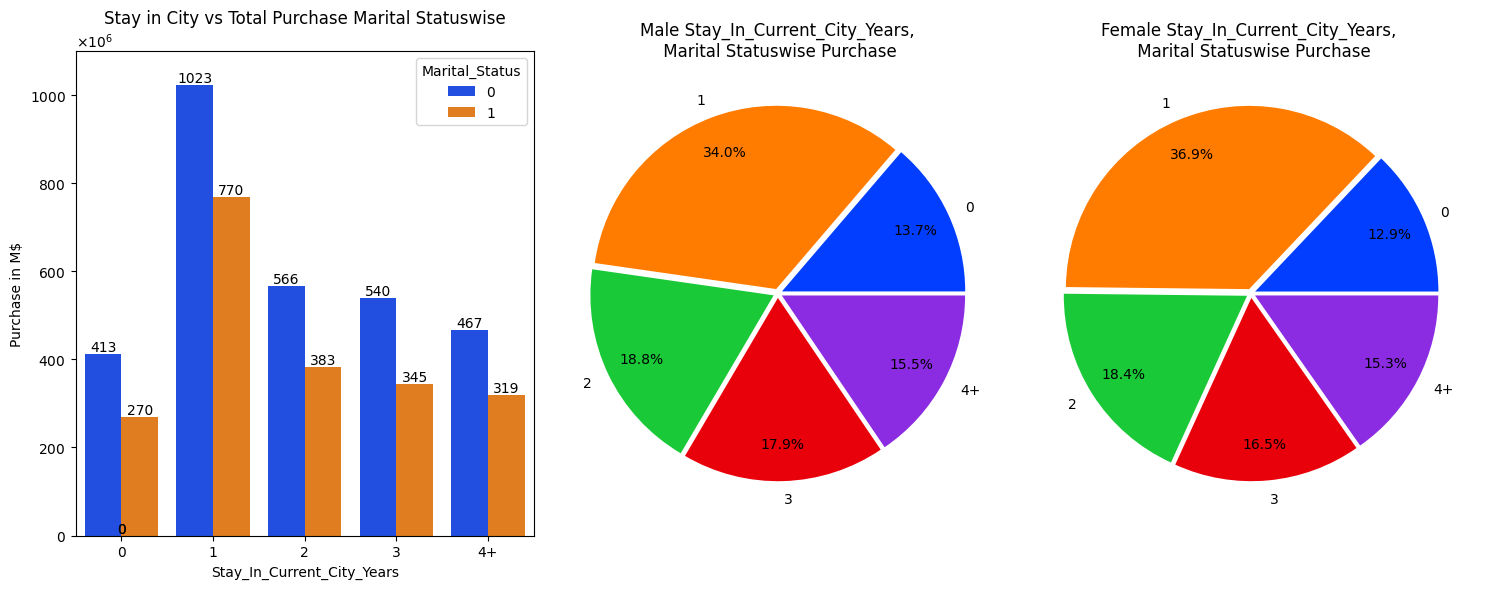

In [96]:
grp11_2 = pd.DataFrame(df.groupby(['Stay_In_Current_City_Years','Marital_Status']).agg({'Purchase': 'sum'})).reset_index()
plt.figure(num=3, figsize=(15,6))

plt.subplot(131)
ax = sns.barplot(grp11_2, x = 'Stay_In_Current_City_Years', y= 'Purchase', hue = 'Marital_Status')
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True, useOffset=False))
ax.ticklabel_format(axis='y', style='sci', scilimits=(6,6))
for p in ax.patches:
    ax.annotate(format(p.get_height()/10**6, '.0f'),
                   (p.get_x() + p.get_width() / 2, p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 5),
                   textcoords = 'offset points',
                   rotation = 0)
plt.ylim(0,1.1*10**9)
plt.ylabel('Purchase in M$')
plt.title('Stay in City vs Total Purchase Marital Statuswise')

plt.subplot(132, aspect = 'equal')
plt.pie(grp11_2[grp11_2['Marital_Status'] == 0]['Purchase'], labels= (grp11_2[grp11_2['Marital_Status']== 0]['Stay_In_Current_City_Years']),
        autopct= '%1.1f%%', pctdistance= 0.8,
        explode= [0.025]*(len(grp11_2[grp11_2['Marital_Status'] == 0])))
plt.title('Male Stay_In_Current_City_Years,\n Marital Statuswise Purchase')

plt.subplot(133, aspect = 'equal')
plt.pie(grp11_2[grp11_2['Marital_Status'] == 1]['Purchase'], labels= (grp11_2[grp11_2['Marital_Status']==1]['Stay_In_Current_City_Years']),
        autopct= '%1.1f%%', pctdistance= 0.8, explode= [0.025]*(len(grp11_2[grp11_2['Marital_Status'] == 1])))
plt.title('Female Stay_In_Current_City_Years, \n Marital Statuswise Purchase')



plt.tight_layout()
plt.show()

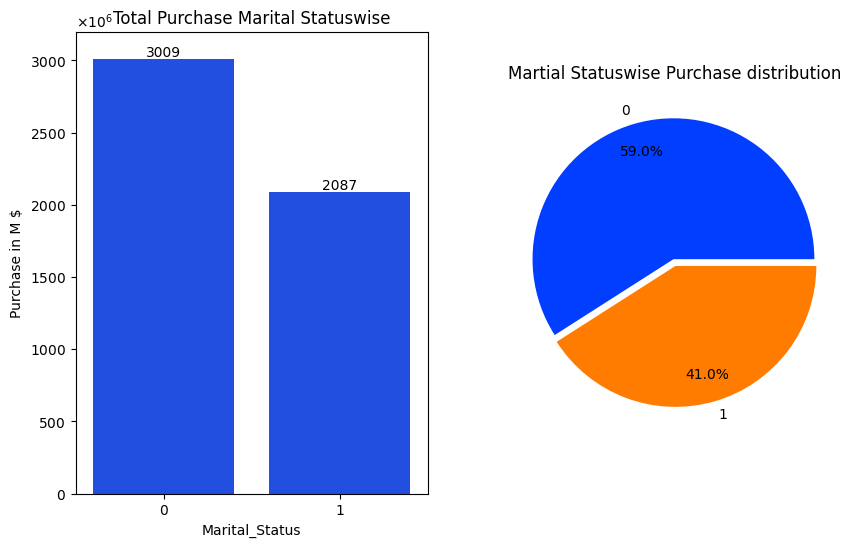

In [97]:
grp12 = pd.DataFrame(df.groupby(['Marital_Status']).agg({'Purchase': 'sum'})).reset_index()

plt.figure(figsize = (10,6), num= 2)
plt.subplot(121)
ax = sns.barplot(grp12, x = 'Marital_Status', y = 'Purchase')
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True, useOffset=False))
ax.ticklabel_format(axis='y', style='sci', scilimits=(6,6))
for p in ax.patches:
    ax.annotate(format(p.get_height()/10**6, '.0f'),
                   (p.get_x() + p.get_width() / 2, p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 5),
                   textcoords = 'offset points',
                   rotation = 0)
plt.ylim(0,3.2*10**9)
plt.ylabel('Purchase in M $')
plt.title('Total Purchase Marital Statuswise')

plt.subplot(122, aspect = 'equal')
plt.pie(grp12['Purchase'], labels=grp12['Marital_Status'],
        autopct= '%1.1f%%', pctdistance= 0.8,
        explode=[0.025]*len(grp12['Marital_Status']))
plt.title('Martial Statuswise Purchase distribution')
plt.show()

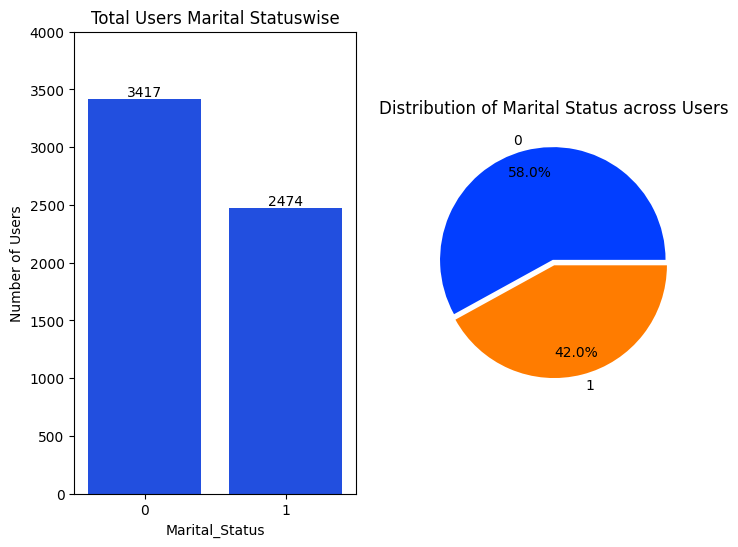

In [98]:
grp12_0 = pd.DataFrame(df.groupby(['Marital_Status']).agg({'User_ID': 'nunique'})).reset_index()
plt.figure(figsize = (8,6), num = 2)
plt.subplot(121)
ax = sns.barplot(grp12_0, x = 'Marital_Status', y = 'User_ID')
# ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True, useOffset=False))
# ax.ticklabel_format(axis='y', style='sci', scilimits=(6,6))
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                   (p.get_x() + p.get_width() / 2, p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 5),
                   textcoords = 'offset points',
                   rotation = 0)
plt.ylim(0,4000)
plt.ylabel('Number of Users')
plt.title('Total Users Marital Statuswise')

plt.subplot(122)
plt.pie(grp12_0['User_ID'], labels=grp12_0['Marital_Status'],
        autopct='%1.1f%%', pctdistance= 0.8,
        explode= [0.025]*len(grp12_0['Marital_Status']))
plt.title('Distribution of Marital Status across Users', loc= 'center')
plt.show()

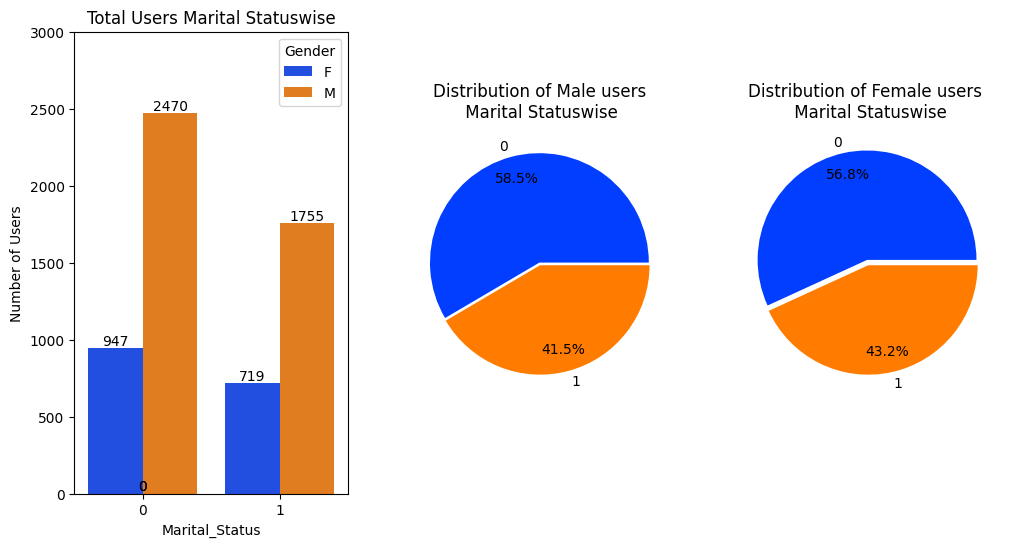

In [99]:
grp12_1 = pd.DataFrame(df.groupby(['Marital_Status','Gender']).agg({'User_ID': 'nunique'})).reset_index()
plt.figure(figsize = (12,6), num = 3)

plt.subplot(131)
ax = sns.barplot(grp12_1, x = 'Marital_Status', y = 'User_ID', hue = 'Gender')
# ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True, useOffset=False))
# ax.ticklabel_format(axis='y', style='sci', scilimits=(6,6))
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                   (p.get_x() + p.get_width() / 2, p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 5),
                   textcoords = 'offset points',
                   rotation = 0)
plt.ylim(0,3000)
plt.ylabel('Number of Users')
plt.title('Total Users Marital Statuswise')

plt.subplot(132, aspect = 'equal')
plt.pie(grp12_1[grp12_1['Gender']== 'M']['User_ID'],labels= grp12_1[grp12_1['Gender']== 'M']['Marital_Status'],
        autopct = '%1.1f%%', pctdistance= 0.8,
         explode = [0.025]*grp12_1[grp12_1['Gender']== 'M']['Marital_Status'])
plt.title('Distribution of Male users\n Marital Statuswise')

plt.subplot(133)
plt.pie(grp12_1[grp12_1['Gender']== 'F']['User_ID'],labels= grp12_1[grp12_1['Gender']== 'F']['Marital_Status'],
        autopct = '%1.1f%%', pctdistance= 0.8,
        explode = [0.025]*len(grp12_1[grp12_1['Gender']== 'F']['Marital_Status']))
plt.title('Distribution of Female users \n Marital Statuswise')
plt.show()

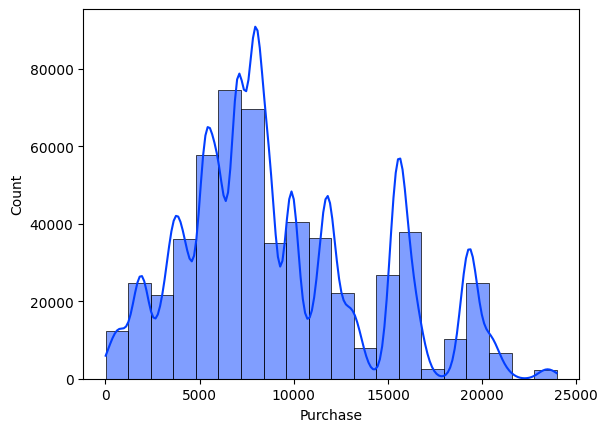

In [101]:
sns.histplot(df, x= 'Purchase', kde= True , bins = 20, linewidth = 0.5)
plt.show()

In [102]:
PC_Genderwise = df[df['Gender'] == 'F'].groupby(['Product_Category']).agg({ 'Purchase' : 'count'}).reset_index()
PC_for_Male = df[df['Gender'] == 'M'].groupby(['Product_Category']).agg({'Purchase':'count'}).reset_index()
PC_Genderwise.columns = ['Product_Category' , 'Female_Purchase']
PC_Genderwise['Male_Purchase'] = PC_for_Male['Purchase'].astype('int')
PC_Genderwise['Female_Purchase'] = PC_Genderwise['Female_Purchase'].astype('int')

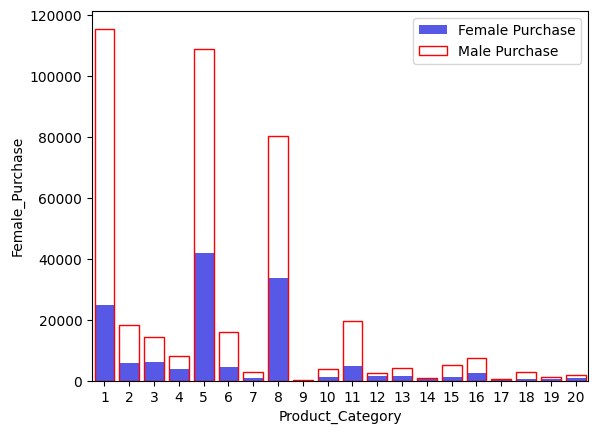

In [103]:
sns.barplot(data=PC_Genderwise, x='Product_Category', y='Female_Purchase', color= 'blue',alpha = 0.75,  label='Female Purchase')
sns.barplot(data=PC_Genderwise, x='Product_Category', y='Male_Purchase', color = 'red', linewidth=1, edgecolor='red', facecolor='none', label='Male Purchase')
plt.legend()
plt.show()

#Most Favoured Categories of Male are 1,5,8,11 and for females are 5,8,1,3 in decending orders.

Q.4 Genderwise Spending habit on Black Friday

In [104]:
df_male = df[df['Gender'] == 'M'].groupby(['User_ID']).agg({'Purchase' : 'sum'}).reset_index()
df_female = df[df['Gender'] == 'F'].groupby(['User_ID']).agg({'Purchase' : 'sum'}).reset_index()
[df_male.shape, df_female.shape]

[(4225, 2), (1666, 2)]

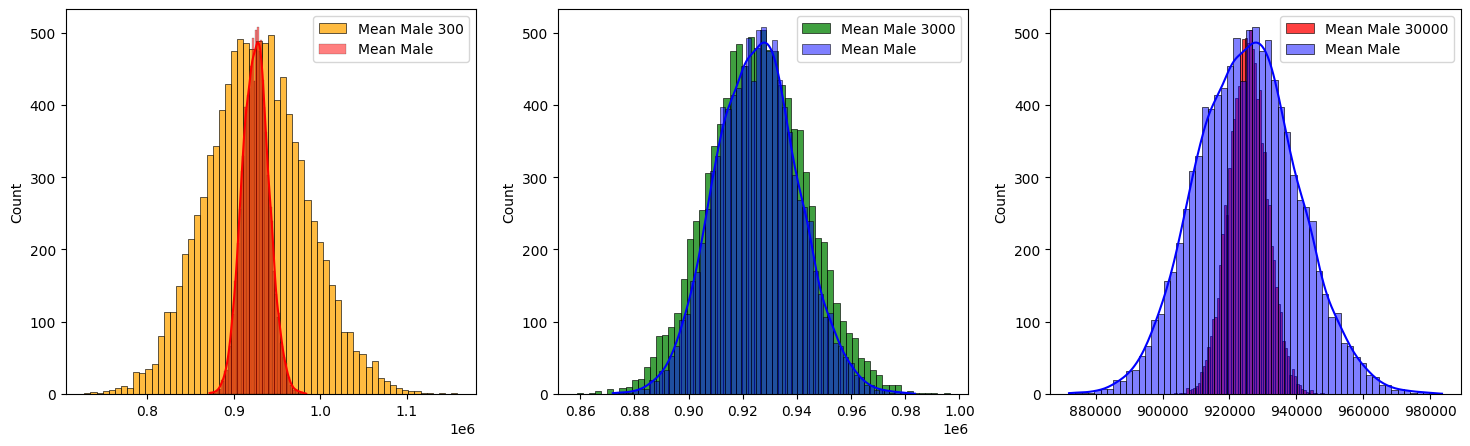

In [105]:
mean_male = [np.mean(df_male['Purchase'].sample(len(df_male['User_ID']), replace = True)) for i in range (10000)]
mean_male_300 = [np.mean(df_male['Purchase'].sample(300, replace = True)) for i in range (10000)]
mean_male_3000 = [np.mean(df_male['Purchase'].sample(3000, replace = True)) for i in range (10000)]
mean_male_30000 = [np.mean(df_male['Purchase'].sample(30000, replace = True)) for i in range (10000)]
plt.figure(num=3, figsize=(18,5))

plt.subplot(131)
sns.histplot(data=mean_male_300, color='orange', label='Mean Male 300')
sns.histplot(data=mean_male,kde = True, color='red', label='Mean Male')
# plt.xlim(750000,1250000)
plt.legend()

plt.subplot(132)
sns.histplot(data=mean_male_3000, color='green', label='Mean Male 3000')
sns.histplot(data=mean_male,kde = True, color='blue', label='Mean Male')
# plt.xlim(750000,1250000)
plt.legend()

plt.subplot(133)
sns.histplot(data=mean_male_30000, color='red', label='Mean Male 30000')
sns.histplot(data=mean_male,kde = True, color='blue', label='Mean Male')
# plt.xlim(750000,1250000)

plt.legend()
plt.show()

In [106]:
mean_female = [np.mean(df_female['Purchase'].sample(len(df_female['User_ID']), replace= True)) for i in range (10000)]
mean_female_300 = [np.mean(df_female['Purchase'].sample(300, replace = True)) for i in range (10000)]
mean_female_3000 = [np.mean(df_female['Purchase'].sample(3000, replace = True)) for i in range (10000)]
mean_female_30000 = [np.mean(df_female['Purchase'].sample(30000, replace = True)) for i in range (10000)]

In [107]:
CI_male_purchase = np.percentile(mean_male, [5, 95])
CI_male_purchase = [int(np.round(value)) for value in CI_male_purchase]
CI_male_purchase_width = CI_male_purchase[1] - CI_male_purchase[0]
[CI_male_purchase , CI_male_purchase_width]

[[900868, 950448], 49580]

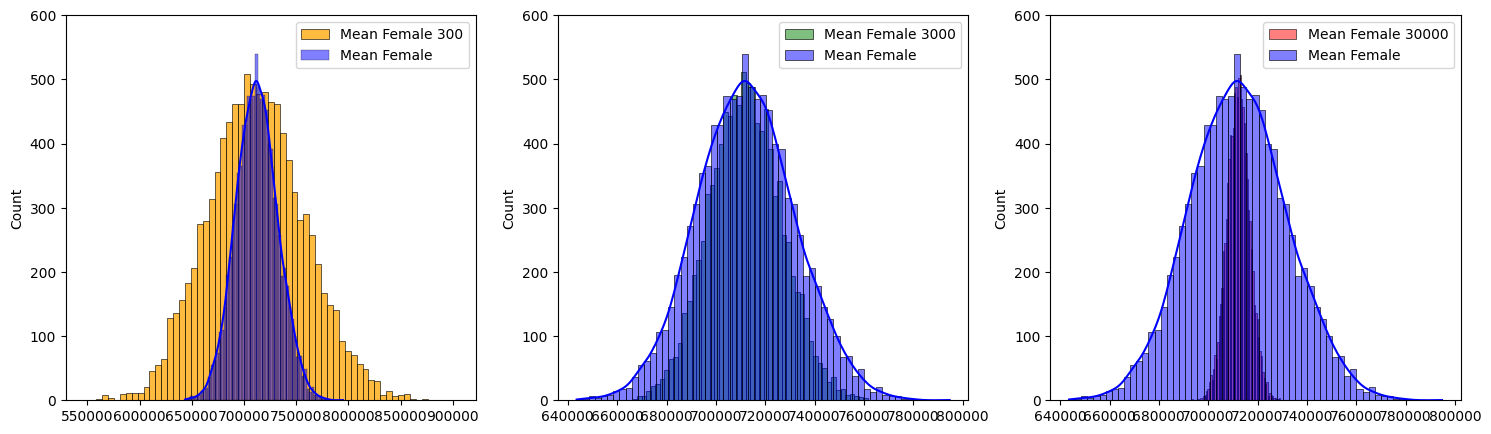

In [108]:
plt.figure(num=3, figsize=(18,5))

plt.subplot(131)
sns.histplot(data=mean_female_300, color='orange', label='Mean Female 300')
sns.histplot(data=mean_female,kde = True, color='blue', label='Mean Female')
# plt.xlim(550000,1000000)
plt.ylim(0,600)
plt.legend()

plt.subplot(132)
sns.histplot(data=mean_female_3000, color='green', label='Mean Female 3000', alpha=0.5)
sns.histplot(data=mean_female,kde = True, color='blue', label='Mean Female')
# plt.xlim(550000,1000000)
plt.ylim(0,600)
plt.legend()

plt.subplot(133)
sns.histplot(data=mean_female_30000, color='red', label='Mean Female 30000', alpha=0.5)
sns.histplot(data=mean_female,kde = True, color='blue', label='Mean Female')
# plt.xlim(550000,1000000)
plt.ylim(0,600)

plt.legend()
plt.show()


In [109]:
CI_female_purchase = np.percentile(mean_female, [5, 95])
CI_female_purchase = [int(np.round(value)) for value in CI_female_purchase]
CI_female_purchase_width = CI_female_purchase[1] - CI_female_purchase[0]
[CI_female_purchase , CI_female_purchase_width]

[[680226, 745747], 65521]

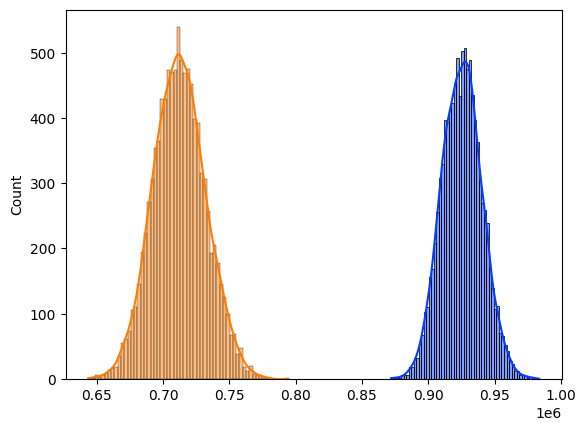

In [110]:
sns.histplot(data=mean_male,kde = True, label='Mean Male')
sns.histplot(data=mean_female,kde = True, label='Mean Female')
plt.show()

#### The confidence interval for Male and Female is of width 49770 and 64191 respectively. The variation is due to the Sample size and Variance of the Female dataset is lower than the Male dataset. The data is highly dependent on the gender for Black Friday Purchases.
#### As the sample size increases the CI becomes less. This is caused due to the reduction in the standard error by square root of the sample size, as evident from both the Histograms of male and female with variation in sample size.
#### As the sample size increses the width of the curve reduces with standard error. The widest dataset is with 300 samples and 30000 is lowest this is expected with increase in sample size. All samples overlap in the order 300 size, 3000 size, dataset size and 30000 size for Males. for Females the 3000 size and dataset size are exchanged in the order, this is due to population size being lower than sample size.


Q5. How does Marital_Status affect the amount spent?

In [111]:
df_status0 = df[df['Marital_Status'] == 0].groupby(['User_ID']).agg({'Purchase' : 'sum'}).reset_index()
df_status1 = df[df['Marital_Status'] == 1].groupby(['User_ID']).agg({'Purchase' : 'sum'}).reset_index()
[df_status0.shape, df_status1.shape]

[(3417, 2), (2474, 2)]

In [112]:
mean_status0 = [np.mean(df_status0['Purchase'].sample(len(df_status0['User_ID']), replace = True)) for i in range (10000)]
mean_status0_300 = [np.mean(df_status0['Purchase'].sample(300, replace = True)) for i in range (10000)]
mean_status0_3000 = [np.mean(df_status0['Purchase'].sample(3000, replace = True)) for i in range (10000)]
mean_status0_30000 = [np.mean(df_status0['Purchase'].sample(30000, replace = True)) for i in range (10000)]


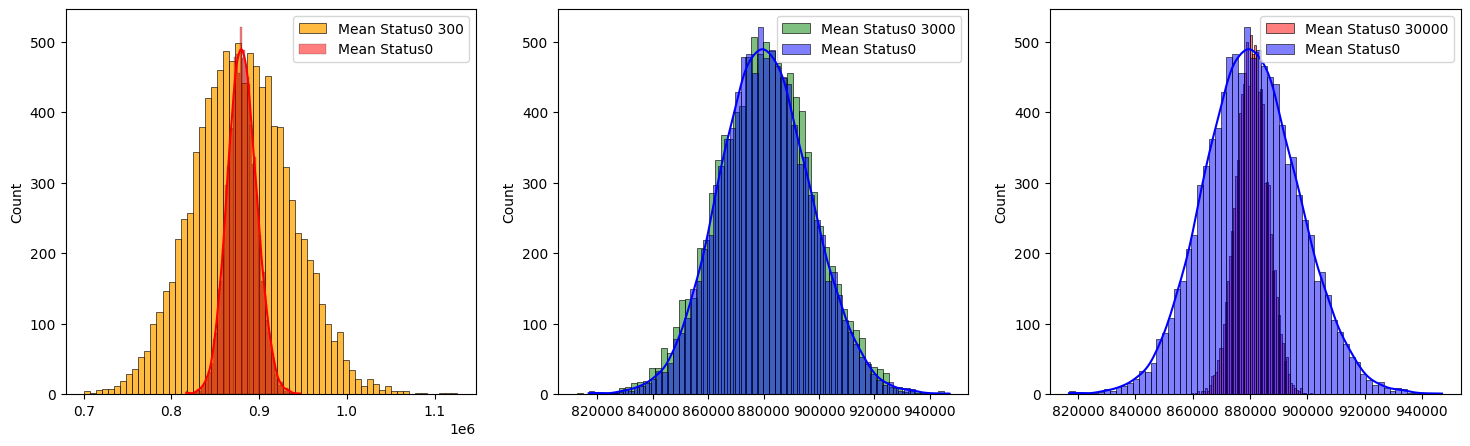

In [113]:
plt.figure(num=3, figsize=(18,5))

plt.subplot(131)
sns.histplot(data=mean_status0_300, color='orange', label='Mean Status0 300')
sns.histplot(data=mean_status0,kde = True, color='red', label='Mean Status0')
# plt.xlim(650000,1100000)
plt.legend()

plt.subplot(132)
sns.histplot(data=mean_status0_3000, color='green', label='Mean Status0 3000', alpha=0.5)
sns.histplot(data=mean_status0,kde = True, color='blue', label='Mean Status0')
# plt.xlim(650000,1100000)
plt.legend()

plt.subplot(133)
sns.histplot(data=mean_status0_30000, color='red', label='Mean Status0 30000', alpha=0.5)
sns.histplot(data=mean_status0,kde = True, color='blue', label='Mean Status0')
# plt.xlim(650000,1100000)

plt.legend()
plt.show()


In [114]:
mean_status1 = [np.mean(df_status1['Purchase'].sample(len(df_status1['User_ID']), replace = True)) for i in range (10000)]
mean_status1_300 = [np.mean(df_status1['Purchase'].sample(300, replace = True)) for i in range (10000)]
mean_status1_3000 = [np.mean(df_status1['Purchase'].sample(3000, replace = True)) for i in range (10000)]
mean_status1_30000 = [np.mean(df_status1['Purchase'].sample(30000, replace = True)) for i in range (10000)]

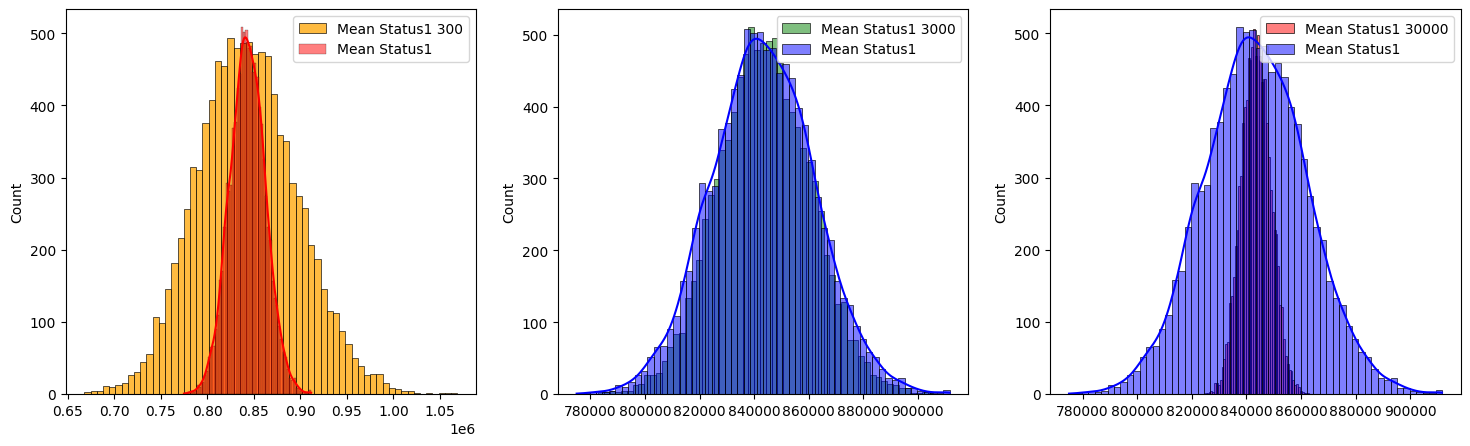

In [115]:
plt.figure(num=3, figsize=(18,5))

plt.subplot(131)
sns.histplot(data=mean_status1_300, color='orange', label='Mean Status1 300')
sns.histplot(data=mean_status1,kde = True, color='red', label='Mean Status1')
# plt.xlim(650000,1100000)
plt.legend()

plt.subplot(132)
sns.histplot(data=mean_status1_3000, color='green', label='Mean Status1 3000', alpha=0.5)
sns.histplot(data=mean_status1,kde = True, color='blue', label='Mean Status1')
# plt.xlim(650000,1100000)
plt.legend()

plt.subplot(133)
sns.histplot(data=mean_status1_30000, color='red', label='Mean Status1 30000', alpha=0.5)
sns.histplot(data=mean_status1,kde = True, color='blue', label='Mean Status1')
# plt.xlim(650000,1100000)

plt.legend()
plt.show()


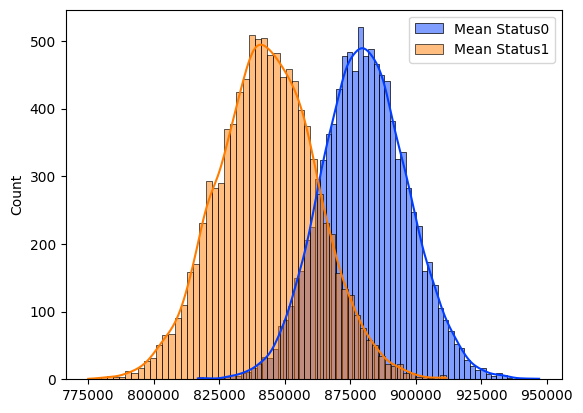

In [116]:
sns.histplot(data=mean_status0,kde = True, label='Mean Status0')
sns.histplot(data=mean_status1,kde = True, label='Mean Status1')
plt.legend()
plt.show()

In [117]:
CI_status0_purchase = np.percentile(mean_status0, [5, 95])
CI_status0_purchase = [int(np.round(value)) for value in CI_status0_purchase]
CI_status0_purchase_width = CI_status0_purchase[1] - CI_status0_purchase[0]
[CI_status0_purchase , CI_status0_purchase_width]

[[854054, 907992], 53938]

In [118]:
CI_status1_purchase = np.percentile(mean_status1, [5, 95])
CI_status1_purchase = [int(np.round(value)) for value in CI_status1_purchase]
CI_status1_purchase_width = CI_status1_purchase[1] - CI_status1_purchase[0]
[CI_status1_purchase , CI_status1_purchase_width]

[[812846, 874598], 61752]

#### The confidence interval for 0 and 1 is of width 52940 and 61966 respectively. The variation is due to the Variance of the 0 dataset is lower than the 1 dataset and sample sizes are different. The curves are overlapping showing that 0 and 1 are mean are nearby. The data is similar and there is minimum effect of Marital status on the black Friday Purchases.
#### As the sample size increases the CI becomes less. This is caused due to the reduction in the standard error by square root of the sample size, as evident from both the Histograms of male and female with variation in sample size.
#### As the sample size increses the width of the curve reduces with standard error. The widest dataset is with 300 samples and 30000 is lowest this is expected with increase in sample size. All samples overlap in the order 300 size, 3000 size, dataset size and 30000 size for Males. for Females the 3000 size and dataset size are exchanged in the order, this is due to population size being lower than sample size.

6. How does Age affect the amount spent?

In [119]:
df_age1 = df[df['Age'] == '0-17'].groupby(['User_ID']).agg({'Purchase' : 'sum'}).reset_index()
df_age2 = df[df['Age'] == '18-25'].groupby(['User_ID']).agg({'Purchase' : 'sum'}).reset_index()
df_age3 = df[df['Age'] == '26-35'].groupby(['User_ID']).agg({'Purchase' : 'sum'}).reset_index()
df_age4 = df[df['Age'] == '36-45'].groupby(['User_ID']).agg({'Purchase' : 'sum'}).reset_index()
df_age5 = df[df['Age'] == '46-50'].groupby(['User_ID']).agg({'Purchase' : 'sum'}).reset_index()
df_age6 = df[df['Age'] == '51-55'].groupby(['User_ID']).agg({'Purchase' : 'sum'}).reset_index()
df_age7 = df[df['Age'] == '55+'].groupby(['User_ID']).agg({'Purchase' : 'sum'}).reset_index()
[df_age1.shape , df_age2.shape,df_age3.shape,df_age4.shape,df_age5.shape,df_age6.shape, df_age7.shape]

[(218, 2), (1069, 2), (2053, 2), (1167, 2), (531, 2), (481, 2), (372, 2)]

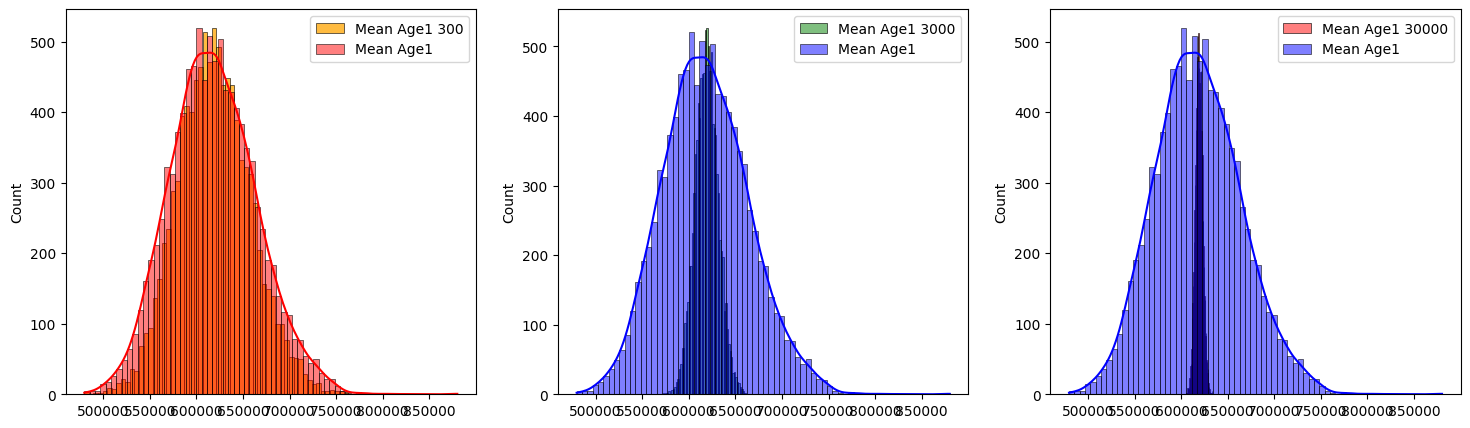

In [120]:
mean_age1 = [np.mean(df_age1['Purchase'].sample(len(df_age1['User_ID']), replace = True)) for i in range (10000)]
mean_age1_300 = [np.mean(df_age1['Purchase'].sample(300, replace = True)) for i in range (10000)]
mean_age1_3000 = [np.mean(df_age1['Purchase'].sample(3000, replace = True)) for i in range (10000)]
mean_age1_30000 = [np.mean(df_age1['Purchase'].sample(30000, replace = True)) for i in range (10000)]
plt.figure(num=3, figsize=(18,5))

plt.subplot(131)
sns.histplot(data=mean_age1_300, color='orange', label='Mean Age1 300')
sns.histplot(data=mean_age1,kde = True, color='red', label='Mean Age1')
plt.legend()

plt.subplot(132)
sns.histplot(data=mean_age1_3000, color='green', label='Mean Age1 3000', alpha=0.5)
sns.histplot(data=mean_age1,kde = True, color='blue', label='Mean Age1')

plt.legend()

plt.subplot(133)
sns.histplot(data=mean_age1_30000, color='red', label='Mean Age1 30000', alpha=0.5)
sns.histplot(data=mean_age1,kde = True, color='blue', label='Mean Age1')


plt.legend()
plt.show()


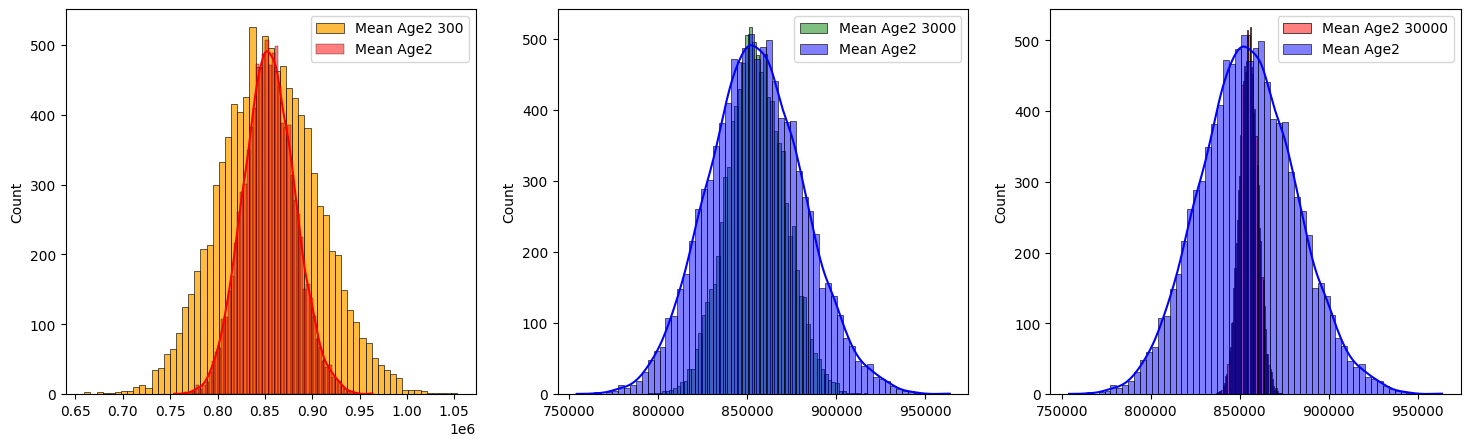

In [121]:
mean_age2 = [np.mean(df_age2['Purchase'].sample(len(df_age2['User_ID']), replace = True)) for i in range (10000)]
mean_age2_300 = [np.mean(df_age2['Purchase'].sample(300, replace = True)) for i in range (10000)]
mean_age2_3000 = [np.mean(df_age2['Purchase'].sample(3000, replace = True)) for i in range (10000)]
mean_age2_30000 = [np.mean(df_age2['Purchase'].sample(30000, replace = True)) for i in range (10000)]
plt.figure(num=3, figsize=(18,5))

plt.subplot(131)
sns.histplot(data=mean_age2_300, color='orange', label='Mean Age2 300')
sns.histplot(data=mean_age2,kde = True, color='red', label='Mean Age2')
plt.legend()

plt.subplot(132)
sns.histplot(data=mean_age2_3000, color='green', label='Mean Age2 3000', alpha=0.5)
sns.histplot(data=mean_age2,kde = True, color='blue', label='Mean Age2')

plt.legend()

plt.subplot(133)
sns.histplot(data=mean_age2_30000, color='red', label='Mean Age2 30000', alpha=0.5)
sns.histplot(data=mean_age2,kde = True, color='blue', label='Mean Age2')


plt.legend()
plt.show()

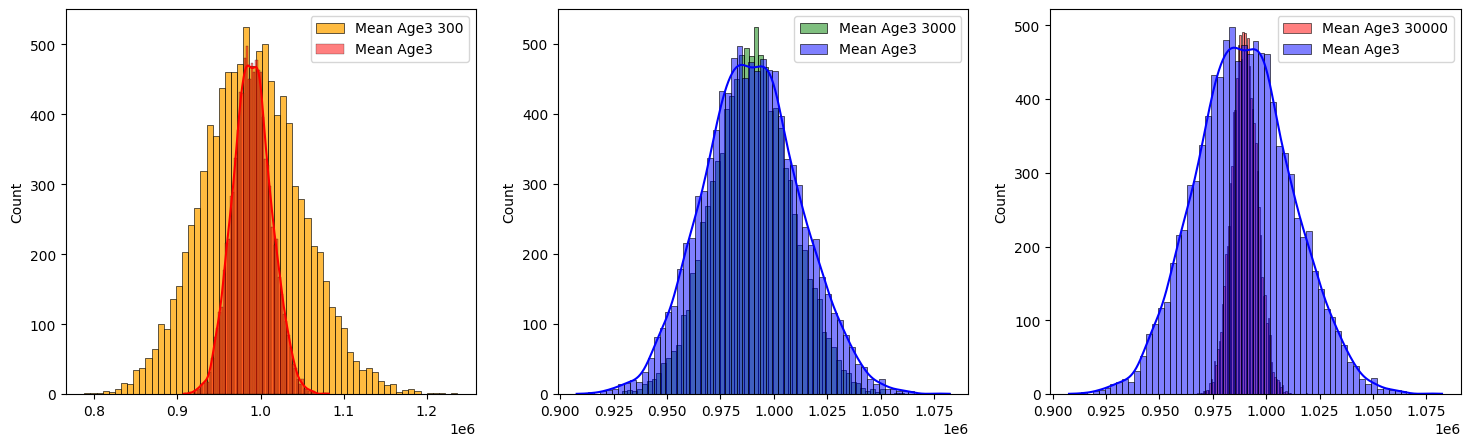

In [122]:
mean_age3 = [np.mean(df_age3['Purchase'].sample(len(df_age3['User_ID']), replace = True)) for i in range (10000)]
mean_age3_300 = [np.mean(df_age3['Purchase'].sample(300, replace = True)) for i in range (10000)]
mean_age3_3000 = [np.mean(df_age3['Purchase'].sample(3000, replace = True)) for i in range (10000)]
mean_age3_30000 = [np.mean(df_age3['Purchase'].sample(30000, replace = True)) for i in range (10000)]
plt.figure(num=3, figsize=(18,5))

plt.subplot(131)
sns.histplot(data=mean_age3_300, color='orange', label='Mean Age3 300')
sns.histplot(data=mean_age3,kde = True, color='red', label='Mean Age3')
plt.legend()

plt.subplot(132)
sns.histplot(data=mean_age3_3000, color='green', label='Mean Age3 3000', alpha=0.5)
sns.histplot(data=mean_age3,kde = True, color='blue', label='Mean Age3')

plt.legend()

plt.subplot(133)
sns.histplot(data=mean_age3_30000, color='red', label='Mean Age3 30000', alpha=0.5)
sns.histplot(data=mean_age3,kde = True, color='blue', label='Mean Age3')


plt.legend()
plt.show()

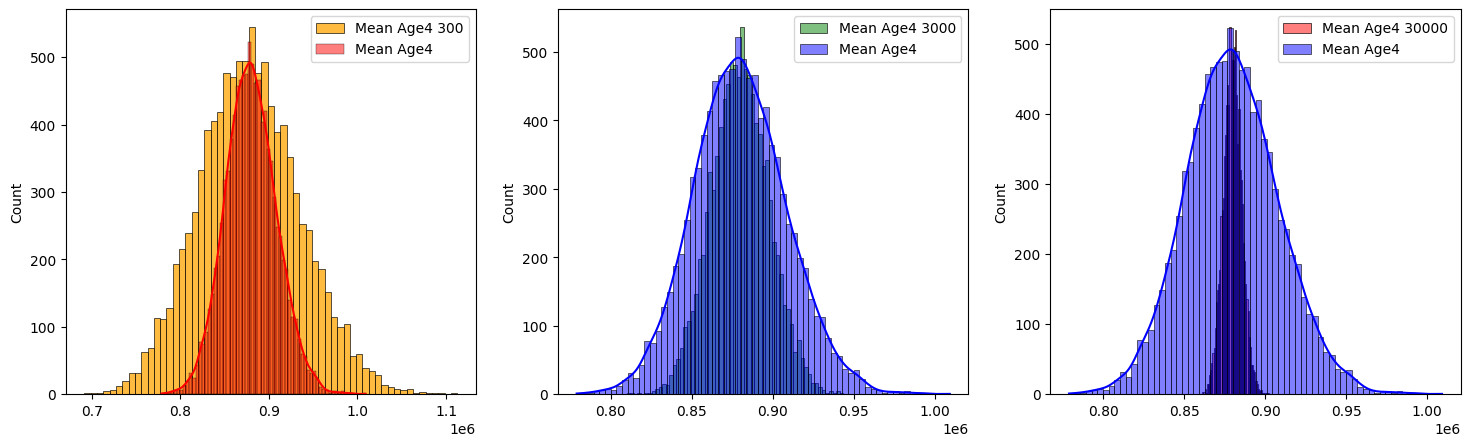

In [123]:
mean_age4 = [np.mean(df_age4['Purchase'].sample(len(df_age4['User_ID']), replace = True)) for i in range (10000)]
mean_age4_300 = [np.mean(df_age4['Purchase'].sample(300, replace = True)) for i in range (10000)]
mean_age4_3000 = [np.mean(df_age4['Purchase'].sample(3000, replace = True)) for i in range (10000)]
mean_age4_30000 = [np.mean(df_age4['Purchase'].sample(30000, replace = True)) for i in range (10000)]
plt.figure(num=3, figsize=(18,5))

plt.subplot(131)
sns.histplot(data=mean_age4_300, color='orange', label='Mean Age4 300')
sns.histplot(data=mean_age4,kde = True, color='red', label='Mean Age4')
plt.legend()

plt.subplot(132)
sns.histplot(data=mean_age4_3000, color='green', label='Mean Age4 3000', alpha=0.5)
sns.histplot(data=mean_age4,kde = True, color='blue', label='Mean Age4')

plt.legend()

plt.subplot(133)
sns.histplot(data=mean_age4_30000, color='red', label='Mean Age4 30000', alpha=0.5)
sns.histplot(data=mean_age4,kde = True, color='blue', label='Mean Age4')


plt.legend()
plt.show()

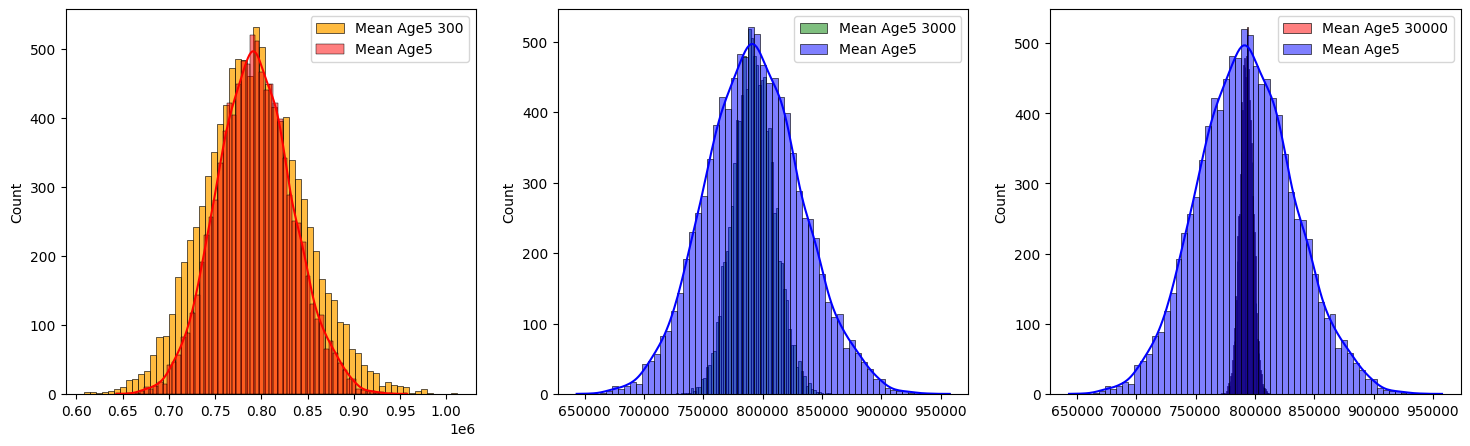

In [124]:
mean_age5 = [np.mean(df_age5['Purchase'].sample(len(df_age5['User_ID']), replace = True)) for i in range (10000)]
mean_age5_300 = [np.mean(df_age5['Purchase'].sample(300, replace = True)) for i in range (10000)]
mean_age5_3000 = [np.mean(df_age5['Purchase'].sample(3000, replace = True)) for i in range (10000)]
mean_age5_30000 = [np.mean(df_age5['Purchase'].sample(30000, replace = True)) for i in range (10000)]
plt.figure(num=3, figsize=(18,5))

plt.subplot(131)
sns.histplot(data=mean_age5_300, color='orange', label='Mean Age5 300')
sns.histplot(data=mean_age5,kde = True, color='red', label='Mean Age5')
plt.legend()

plt.subplot(132)
sns.histplot(data=mean_age5_3000, color='green', label='Mean Age5 3000', alpha=0.5)
sns.histplot(data=mean_age5,kde = True, color='blue', label='Mean Age5')

plt.legend()

plt.subplot(133)
sns.histplot(data=mean_age5_30000, color='red', label='Mean Age5 30000', alpha=0.5)
sns.histplot(data=mean_age5,kde = True, color='blue', label='Mean Age5')


plt.legend()
plt.show()

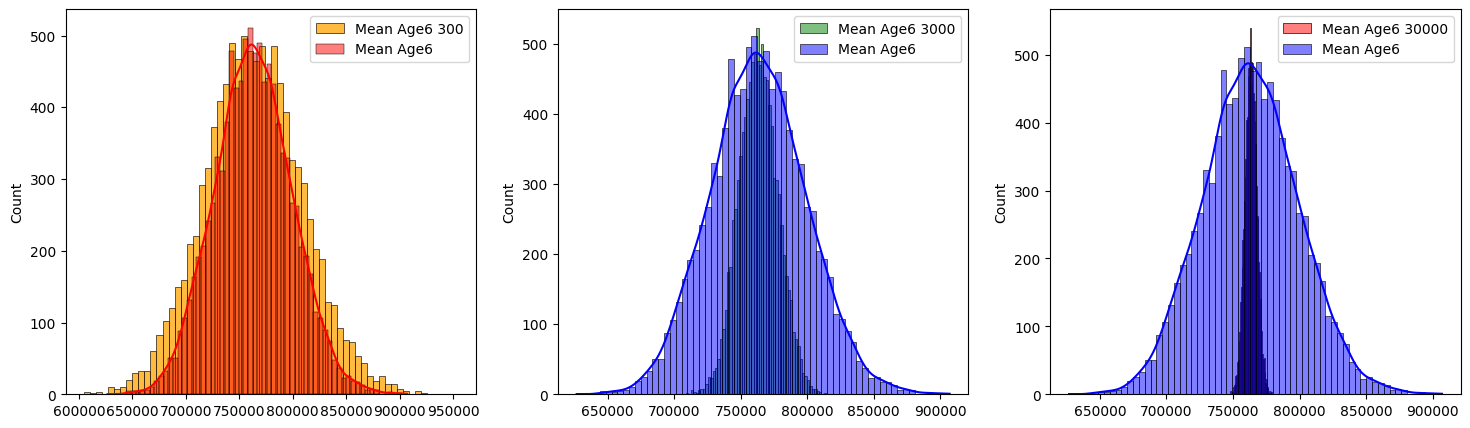

In [125]:
mean_age6 = [np.mean(df_age6['Purchase'].sample(len(df_age6['User_ID']), replace = True)) for i in range (10000)]
mean_age6_300 = [np.mean(df_age6['Purchase'].sample(300, replace = True)) for i in range (10000)]
mean_age6_3000 = [np.mean(df_age6['Purchase'].sample(3000, replace = True)) for i in range (10000)]
mean_age6_30000 = [np.mean(df_age6['Purchase'].sample(30000, replace = True)) for i in range (10000)]
plt.figure(num=3, figsize=(18,5))

plt.subplot(131)
sns.histplot(data=mean_age6_300, color='orange', label='Mean Age6 300')
sns.histplot(data=mean_age6,kde = True, color='red', label='Mean Age6')
plt.legend()

plt.subplot(132)
sns.histplot(data=mean_age6_3000, color='green', label='Mean Age6 3000', alpha=0.5)
sns.histplot(data=mean_age6,kde = True, color='blue', label='Mean Age6')

plt.legend()

plt.subplot(133)
sns.histplot(data=mean_age6_30000, color='red', label='Mean Age6 30000', alpha=0.5)
sns.histplot(data=mean_age6,kde = True, color='blue', label='Mean Age6')


plt.legend()
plt.show()

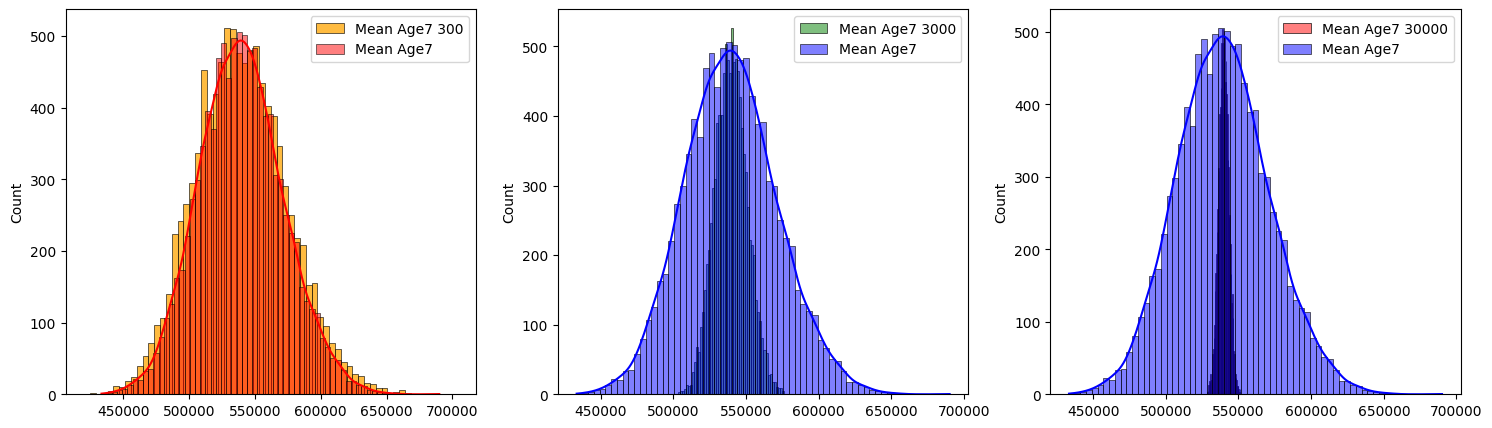

In [126]:
mean_age7 = [np.mean(df_age7['Purchase'].sample(len(df_age7['User_ID']), replace = True)) for i in range (10000)]
mean_age7_300 = [np.mean(df_age7['Purchase'].sample(300, replace = True)) for i in range (10000)]
mean_age7_3000 = [np.mean(df_age7['Purchase'].sample(3000, replace = True)) for i in range (10000)]
mean_age7_30000 = [np.mean(df_age7['Purchase'].sample(30000, replace = True)) for i in range (10000)]
plt.figure(num=3, figsize=(18,5))

plt.subplot(131)
sns.histplot(data=mean_age7_300, color='orange', label='Mean Age7 300')
sns.histplot(data=mean_age7,kde = True, color='red', label='Mean Age7')
plt.legend()

plt.subplot(132)
sns.histplot(data=mean_age7_3000, color='green', label='Mean Age7 3000', alpha=0.5)
sns.histplot(data=mean_age7,kde = True, color='blue', label='Mean Age7')

plt.legend()

plt.subplot(133)
sns.histplot(data=mean_age7_30000, color='red', label='Mean Age7 30000', alpha=0.5)
sns.histplot(data=mean_age7,kde = True, color='blue', label='Mean Age7')


plt.legend()
plt.show()

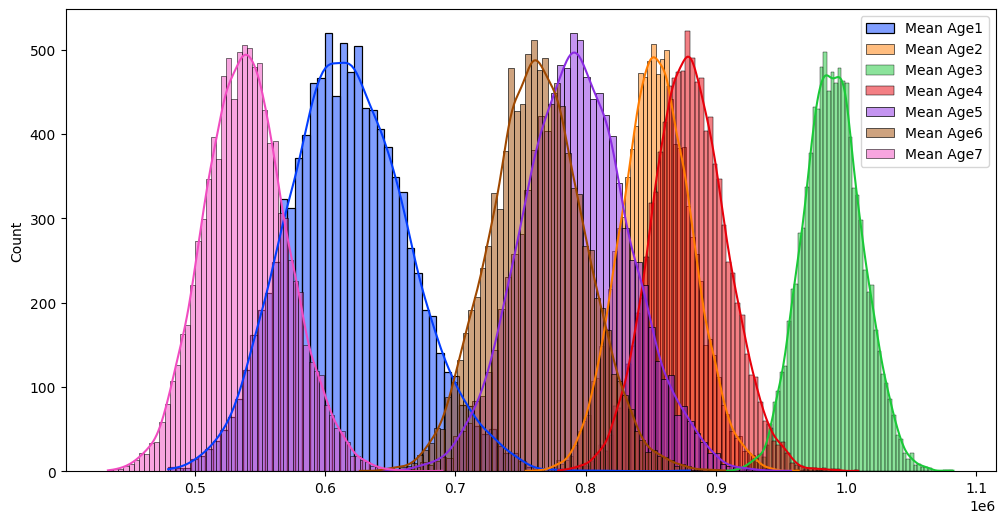

In [127]:
plt.figure(figsize= (12,6))
sns.histplot(data=mean_age1,kde = True, label='Mean Age1')
sns.histplot(data=mean_age2,kde = True, label='Mean Age2')
sns.histplot(data=mean_age3,kde = True, label='Mean Age3')
sns.histplot(data=mean_age4,kde = True, label='Mean Age4')
sns.histplot(data=mean_age5,kde = True, label='Mean Age5')
sns.histplot(data=mean_age6,kde = True, label='Mean Age6')
sns.histplot(data=mean_age7,kde = True, label='Mean Age7')
plt.legend()
plt.show()

# As evident from population of each age group is lower than 3000 and some of the sample sizes are near the 300. This has lead to the 3000 and 30000 with very small SD than the original data.
# The above figure shows that highest spending group is 26-35, followed by 36-45. and least spending groups is age 55+ and 0-17.
# The width of the distribution of mean varies with population inversly proportional manner.

**Targeted Marketing Strategies for Increased Sales**

Understanding customer demographics and transaction patterns is crucial for devising effective marketing strategies. The analysis reveals that a significant majority of transactions are made by males. Therefore, tailoring marketing efforts to cater to their preferences and needs can yield higher returns. Specific promotions, product offerings, and advertising campaigns designed to attract male customers should be developed.

Moreover, focusing marketing efforts on popular occupations can be advantageous. The data indicates that transactions are predominantly from customers in specific occupations. Concentrating marketing efforts on these occupations can lead to better engagement and conversion rates. By understanding the needs and preferences of individuals in these occupations, tailored marketing campaigns and customized offers can be created.

---

**Engagement Strategies for New Residents and Existing Customers**

A notable portion of transactions originates from customers who have recently moved to the current city. This presents an opportunity to engage with these new residents and capture their loyalty. Targeted marketing, welcoming offers, and incentives can be provided to attract and retain these customers. Additionally, it's crucial to focus on existing customers, especially single customers who contribute significantly to total revenue. Personalized offers, loyalty rewards, and exclusive discounts can enhance their shopping experience and encourage repeat purchases.

---

**Optimizing Product Categories and Revenue Generation**

The analysis highlights the significance of certain product categories in driving overall sales. Allocating resources and promotions towards these categories can maximize sales potential. Highlighting popular categories and offering attractive deals can encourage more purchases. Furthermore, expanding the product range within these categories and identifying complementary products can attract more customers and increase sales.

---

**Location-Based and Seasonal Marketing Strategies**

Tailoring marketing strategies to target specific locations and aligning promotions with seasonal events and holidays can lead to better results. Implementing location-based marketing campaigns and offering event-based promotions can create a sense of urgency and drive sales. Leveraging seasonal events and special occasions to offer targeted discounts and promotions can capitalize on customer spending behavior during these periods.

---

**Customer Engagement and Personalization**

Effective customer engagement strategies are essential for building long-term relationships and increasing brand loyalty. Implementing targeted marketing campaigns, personalized email communications, and social media engagement can keep customers informed and engaged. Utilizing customer feedback to make improvements and providing personalized recommendations based on individual preferences can enhance the overall customer experience.

---

**Competitive Pricing and Collaborations**

Monitoring competitors' pricing and promotional activities is crucial for maintaining competitiveness. Offering price-match guarantees and leveraging collaborations with popular brands or influencers can attract new customers and increase brand visibility. Collaborations provide opportunities for joint promotions and exclusive offers, further enticing customers to make purchases.

---

In conclusion, by leveraging the insights gained from the data analysis, businesses can develop targeted marketing strategies, engage with customers effectively, optimize product offerings, and stay competitive in the market. Implementing these recommendations can lead to increased sales, enhanced customer satisfaction, and sustainable business growth.